In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

# PHASE 1

## 1.2: LOAD DATASET

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1.3: MISSING VALUES

In [4]:
df.drop('Id', axis=1, inplace=True)

<Axes: >

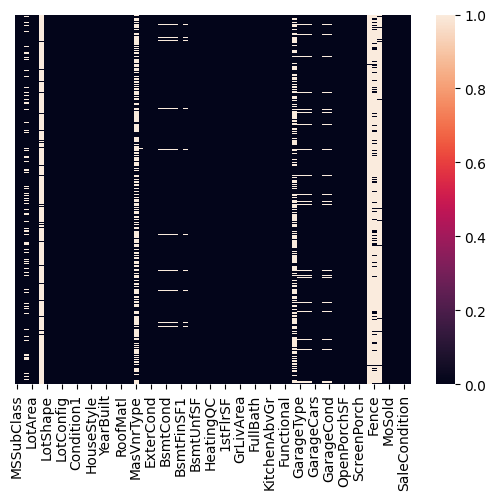

In [5]:
sns.heatmap(df.isna(), yticklabels=False)

In [6]:
# sum of null values of columns
na_sum = df.isna().sum().sort_values(ascending=False)
na_percent = na_sum / df.isna().count().sort_values(ascending=False)
na_df = pd.concat([na_sum, na_percent], axis=1, keys=['Sum', 'Percentage'])


# drop all rows that contain 0
na_df = na_df.drop(na_df[na_df['Sum'] == 0].index)

In [7]:
na_df

Sum  Percentage
PoolQC        1453    0.995205
MiscFeature   1406    0.963014
Alley         1369    0.937671
Fence         1179    0.807534
MasVnrType     872    0.597260
FireplaceQu    690    0.472603
LotFrontage    259    0.177397
GarageYrBlt     81    0.055479
GarageCond      81    0.055479
GarageType      81    0.055479
GarageFinish    81    0.055479
GarageQual      81    0.055479
BsmtExposure    38    0.026027
BsmtFinType2    38    0.026027
BsmtCond        37    0.025342
BsmtQual        37    0.025342
BsmtFinType1    37    0.025342
MasVnrArea       8    0.005479
Electrical       1    0.000685

In [8]:
na_cols = list(na_df.index)
na_cols

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea',
 'Electrical']

In [9]:
numeric = df._get_numeric_data().columns.tolist()
na_num = [col for col in numeric if col in na_cols]

year = [col for col in numeric if 'Yr' in col or 'Year' in col]
na_year = [col for col in year if col in na_cols]

discrete = [col for col in numeric if len(df[col].unique())<25 and col not in year+['Id']]
na_discrete = [col for col in discrete if col in na_cols]

continuous = [col for col in numeric if col not in discrete+year+['Id']]
na_continuous = [col for col in continuous if col in na_cols]

categorical = list(set(df.columns)-set(numeric))
na_cat = [col for col in categorical if col in na_cols]

len(numeric), len(categorical)

(37, 43)

In [10]:
na_num, na_year, na_discrete, na_continuous, na_cat

(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 ['GarageYrBlt'],
 [],
 ['LotFrontage', 'MasVnrArea'],
 ['FireplaceQu',
  'BsmtFinType2',
  'GarageQual',
  'GarageCond',
  'MiscFeature',
  'MasVnrType',
  'GarageFinish',
  'Electrical',
  'Fence',
  'BsmtFinType1',
  'BsmtQual',
  'BsmtExposure',
  'BsmtCond',
  'PoolQC',
  'GarageType',
  'Alley'])

In [11]:
for col in na_cat:
    print(col)
    print(df[col].unique())
    print()

FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']

MasVnrType
['BrkFace' nan 'Stone' 'BrkCmn']

GarageFinish
['RFn' 'Unf' 'Fin' nan]

Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']

BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]

BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']

PoolQC
[nan 'Ex' 'Fa' 'Gd']

GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Alley
[nan 'Grvl' 'Pave']



A missing categorical value is very likely an indication of the absence of that feature in that house.

## 1.4: DATA CLEANING

In [12]:
for col in na_cat:
    df[col] = df[col].fillna('None')

df[na_cat].isna().any()

FireplaceQu     False
BsmtFinType2    False
GarageQual      False
GarageCond      False
MiscFeature     False
MasVnrType      False
GarageFinish    False
Electrical      False
Fence           False
BsmtFinType1    False
BsmtQual        False
BsmtExposure    False
BsmtCond        False
PoolQC          False
GarageType      False
Alley           False
dtype: bool

In [13]:
for col in na_num:
    # due to the presence of outliers, null values would be replaced with the median
    num_median = df[col].median()
    df[col] = df[col].fillna(num_median)

df[na_num].isna().any()

LotFrontage    False
MasVnrArea     False
GarageYrBlt    False
dtype: bool

In [14]:
df[year].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

# PHASE 2

## 2.1: EDA

In [15]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Histogram Distibution of Sale Price')

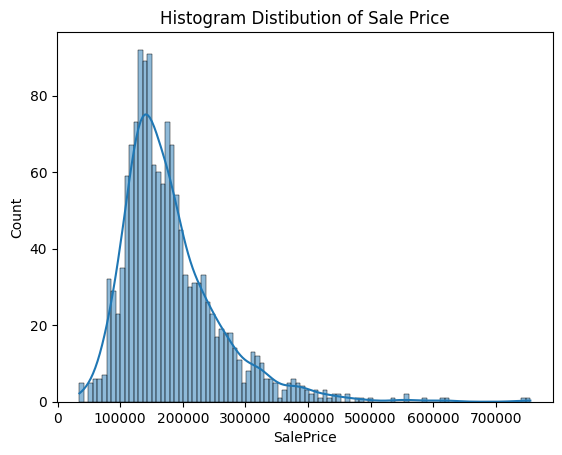

In [16]:
sns.histplot(df['SalePrice'], bins=100, kde=True)
plt.title('Histogram Distibution of Sale Price')

Text(0.5, 1.0, 'Boxplot Distribution of Sale Price')

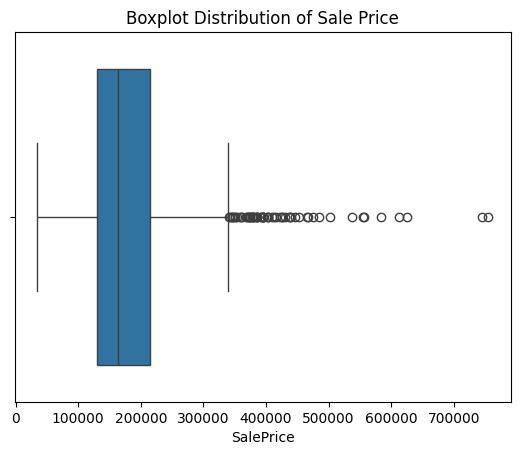

In [17]:
sns.boxplot(df, x='SalePrice')
plt.title('Boxplot Distribution of Sale Price')

In [18]:
df[numeric].corr().iloc[:,-1:]

SalePrice
MSSubClass     -0.084284
LotFrontage     0.334771
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.466754
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

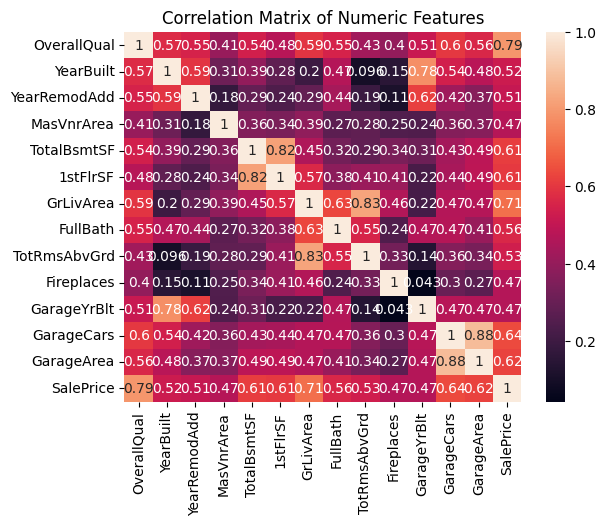

In [19]:
corrmat = df[numeric].corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>0.4]
sns.heatmap(df[top_corr_features].corr(), annot=True)
plt.title('Correlation Matrix of Numeric Features')

In [20]:
df[numeric].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [21]:
print(f'Continuous:\n{continuous}\n')
discrete.remove('MoSold')
print(f'Discrete:\n{discrete}\n')
print(f'Year:\n{year}\n')
month = ['MoSold']

Continuous:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

Discrete:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal']

Year:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']



### CONTINUOUS VARIABLES

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

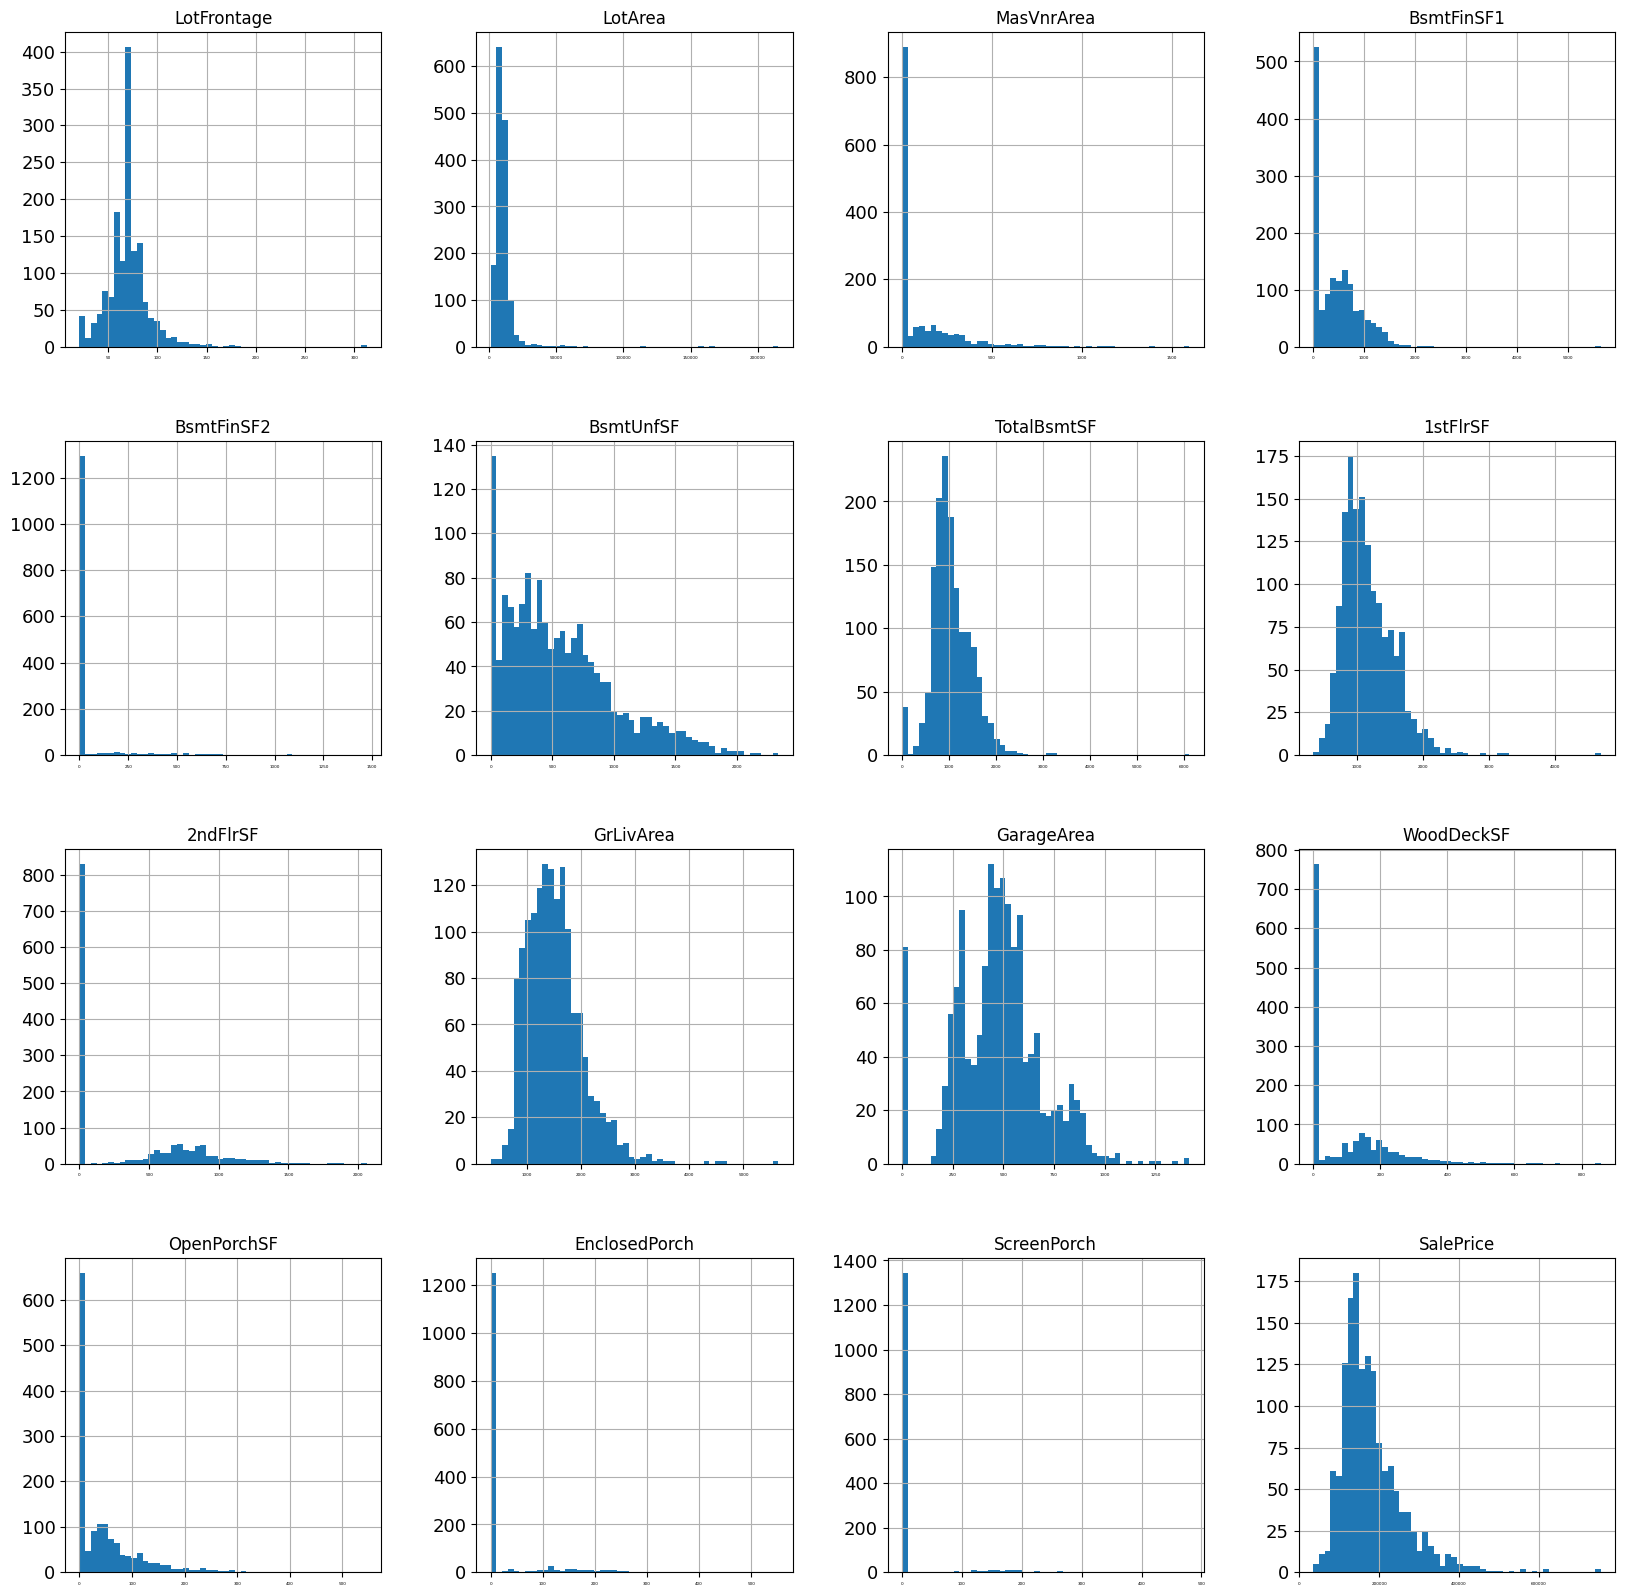

In [22]:
df[continuous].hist(figsize=(20, 20), bins=50, xlabelsize=3, ylabelsize=13)

- The continuous variables all have a similar skew to the left

In [23]:
len(continuous)

16

Text(0.5, 1.0, 'KDE Distribution of the Continuous Features')

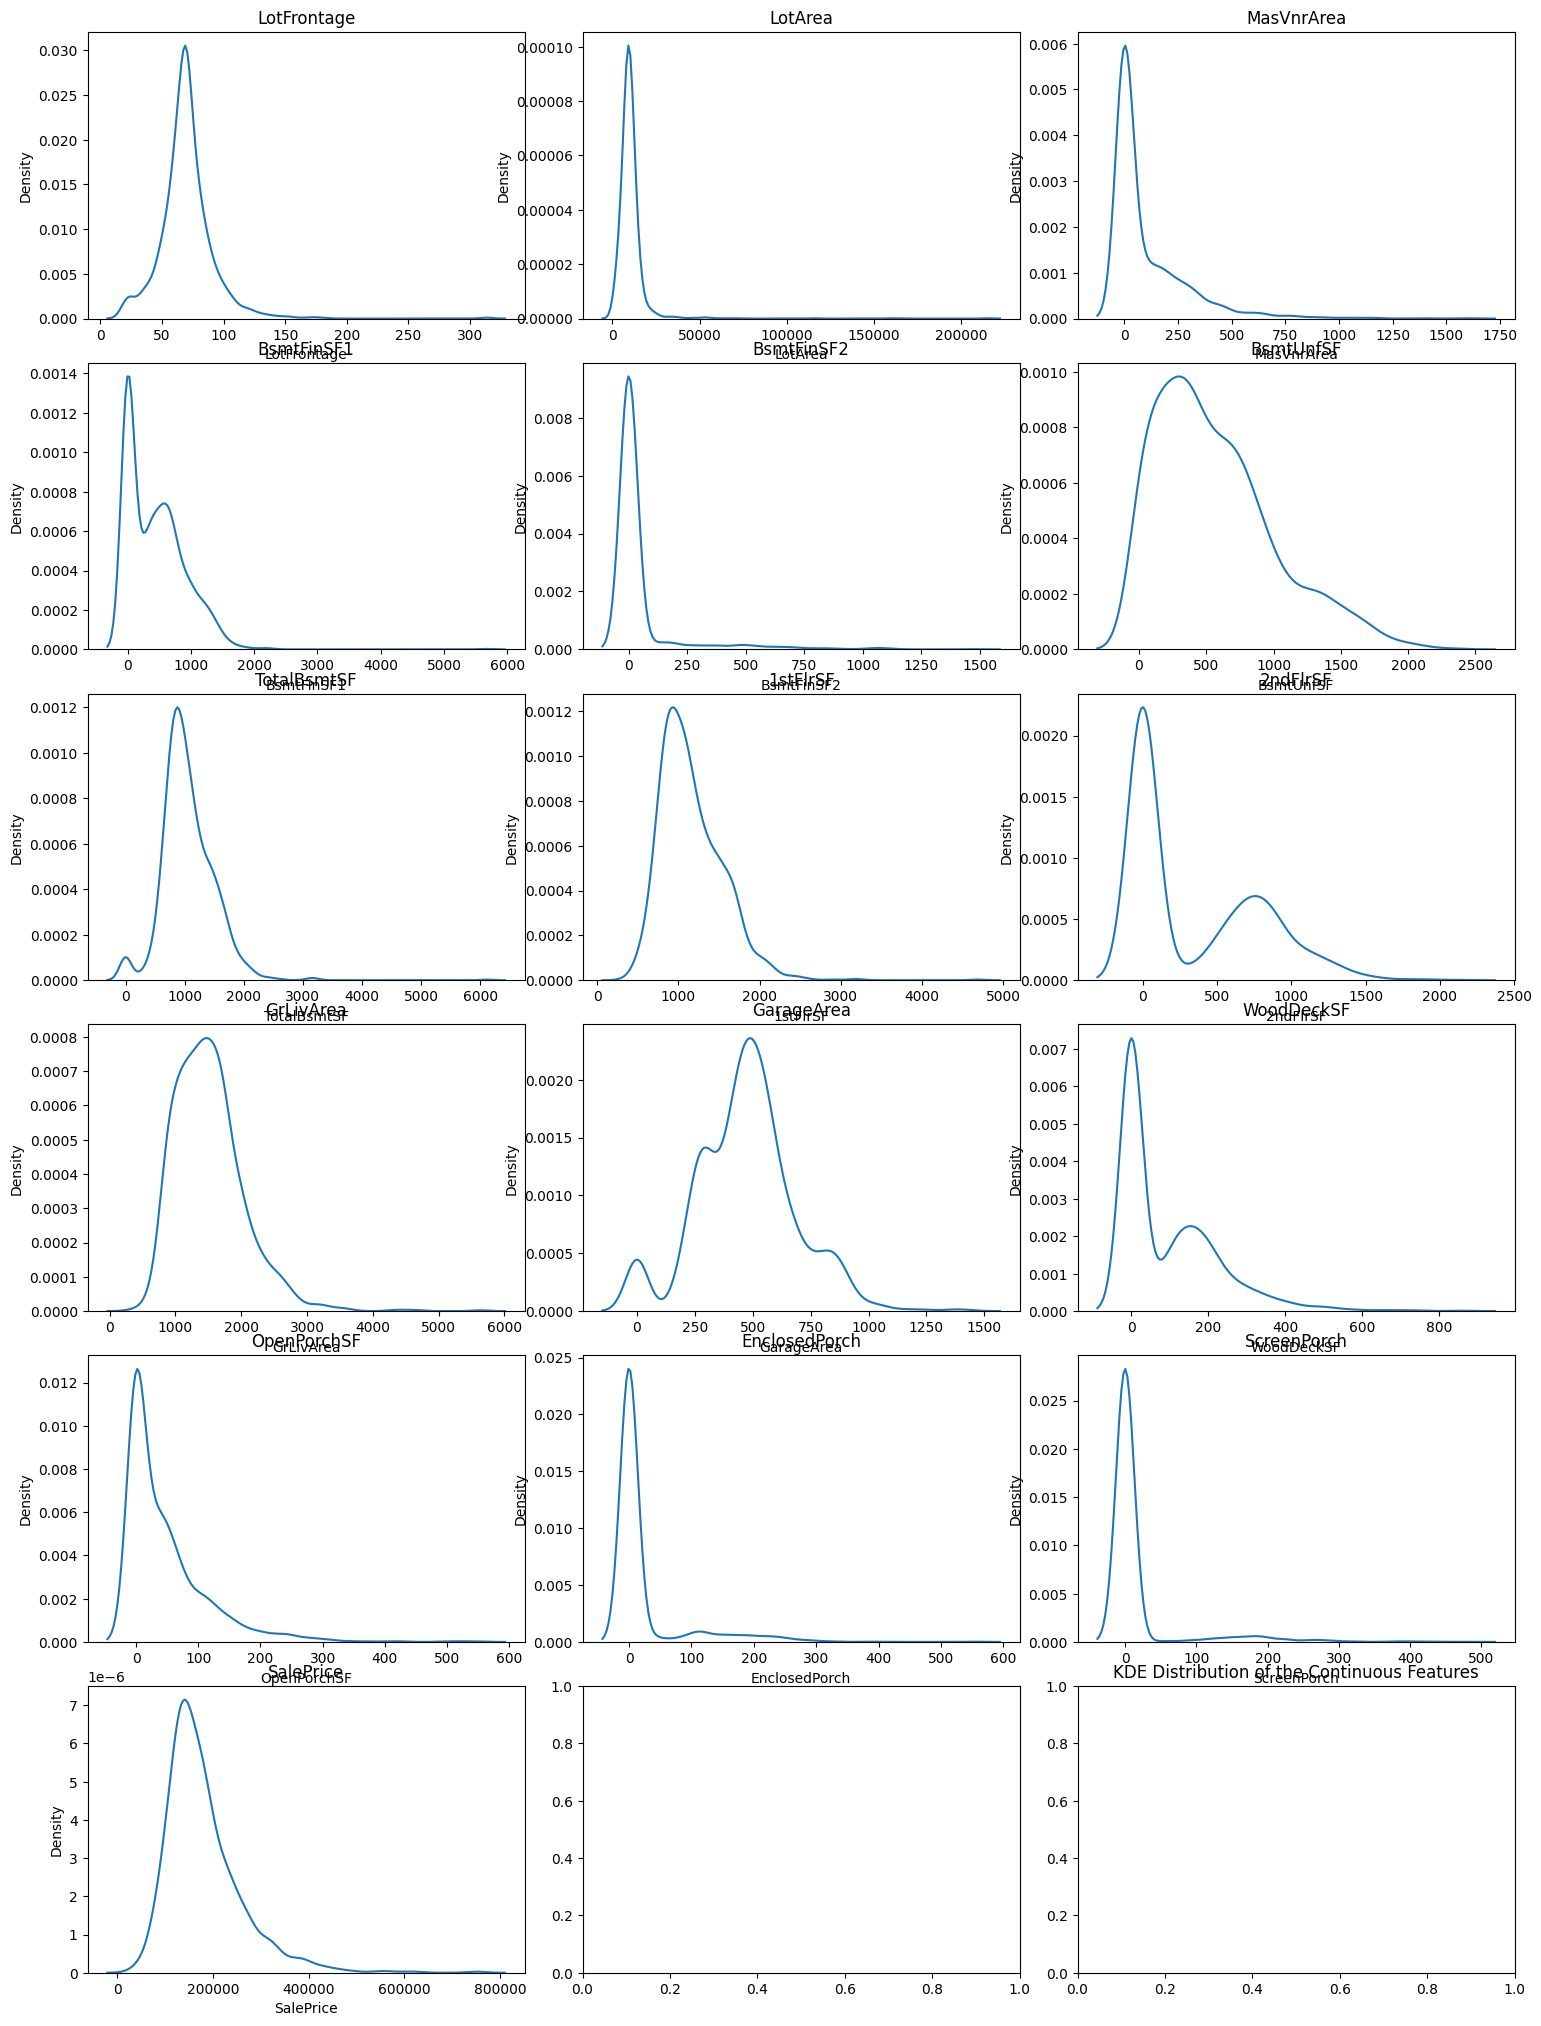

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
fig.tight_layout()

for i, col in enumerate(continuous):
  row, col_idx = divmod(i, 3)
  sns.kdeplot(data=df[continuous], x=col, ax=axes[row, col_idx])
  axes[row, col_idx].set_title(col)
  #axes.tight_layout()
plt.title('KDE Distribution of the Continuous Features')

Text(0.5, 1.0, 'Pairplot of Continuous Features')

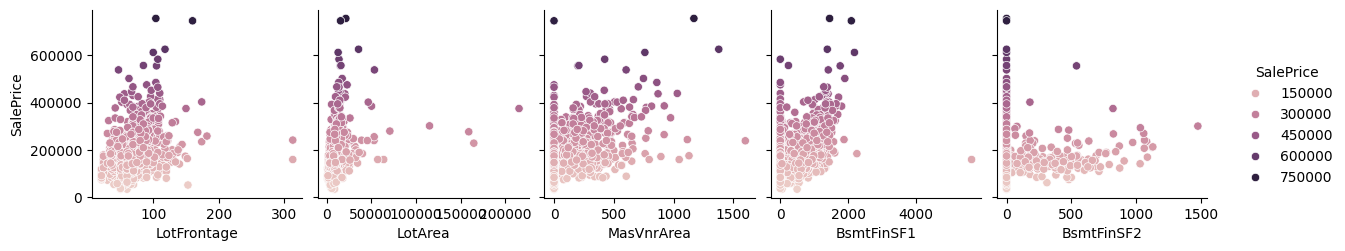

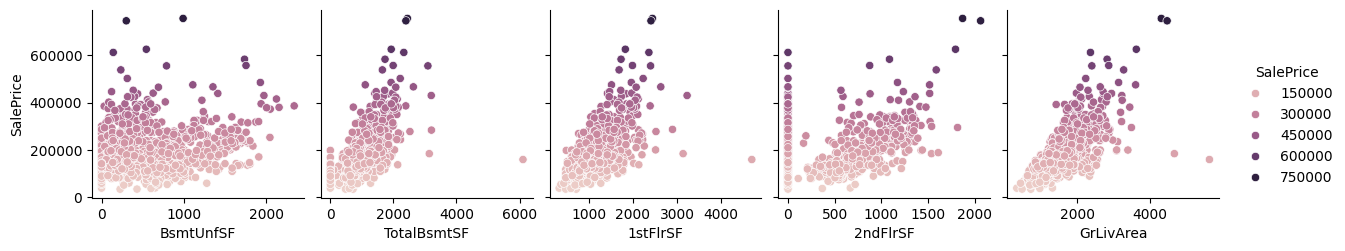

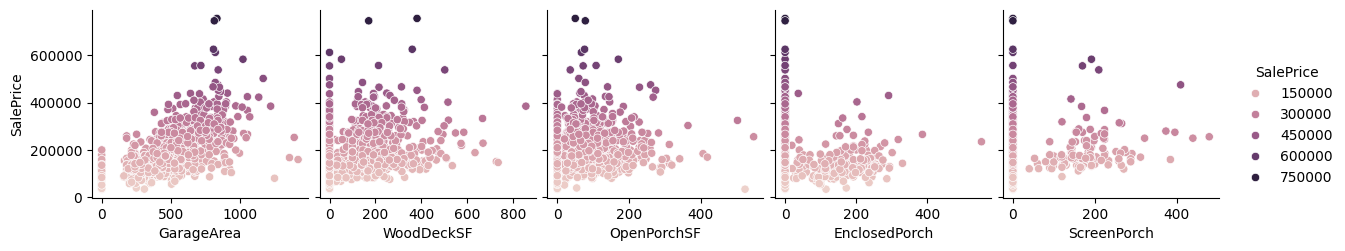

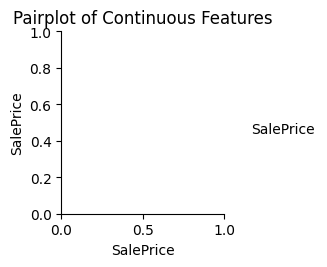

In [25]:
for i in range(0, len(df[continuous].columns), 5):
    sns.pairplot(df, x_vars=df[continuous].columns[i:i+5], y_vars=['SalePrice'], hue='SalePrice')
plt.title('Pairplot of Continuous Features')

Text(0.5, 1.0, 'Regression plot of Continuous Features')

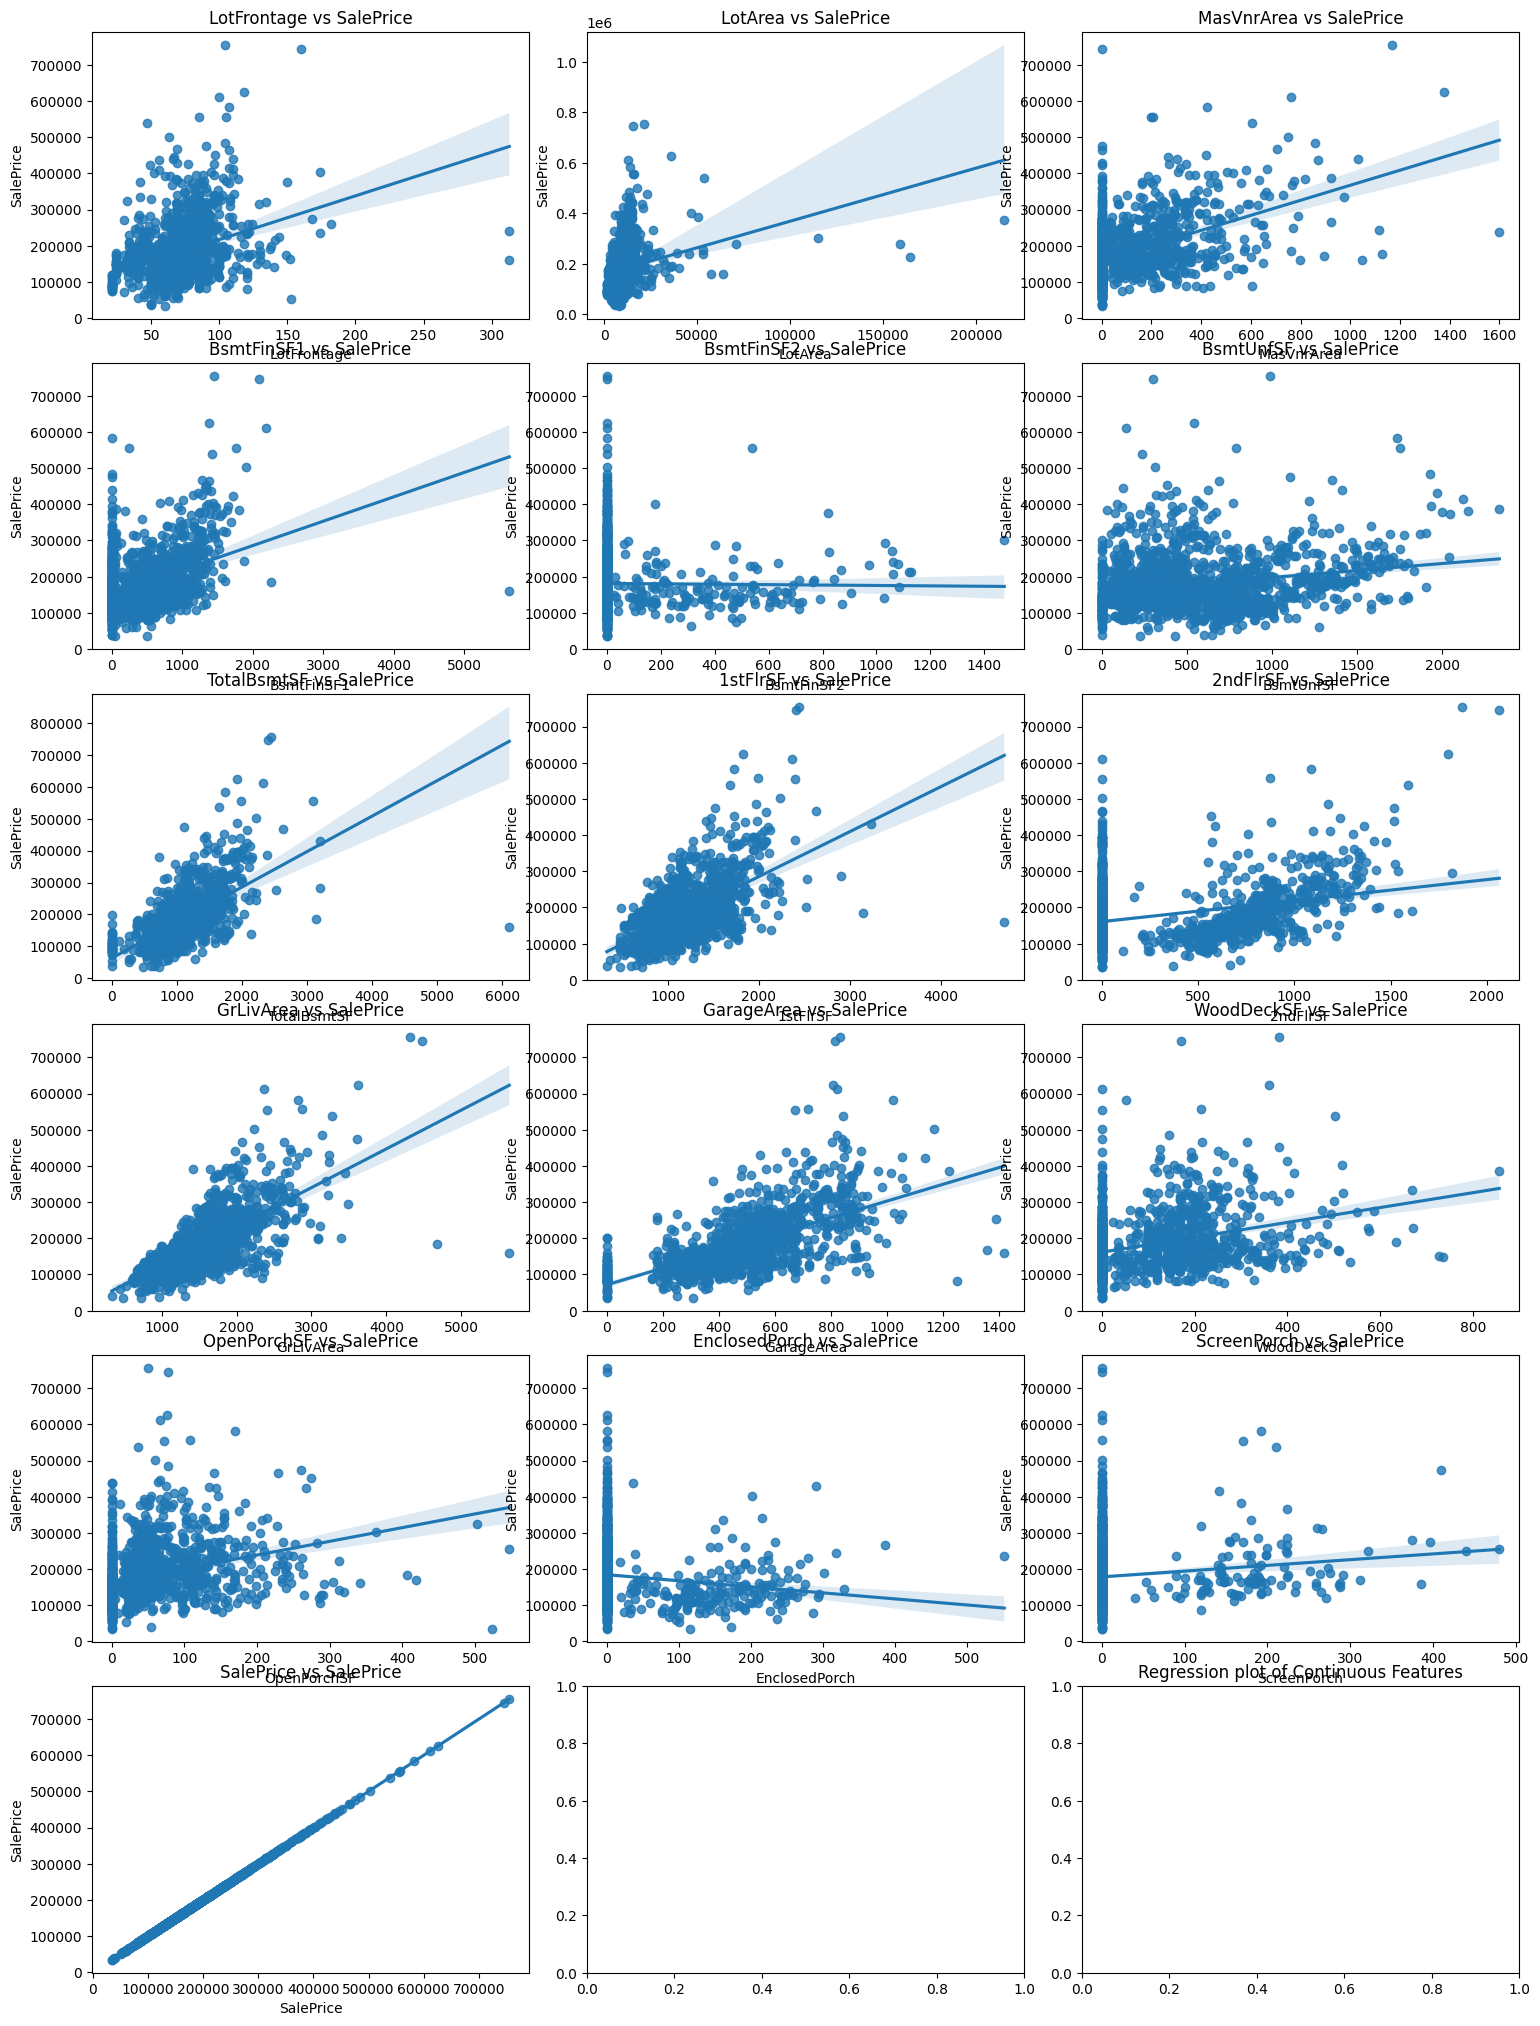

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
fig.tight_layout()

for i, col in enumerate(continuous):
  row, col_idx = divmod(i, 3)
  sns.regplot(x=col, y='SalePrice', data=df, ax=axes[row, col_idx])
  axes[row, col_idx].set_title(f"{col} vs SalePrice")
plt.title('Regression plot of Continuous Features')

### DISCRETE VARIABLES

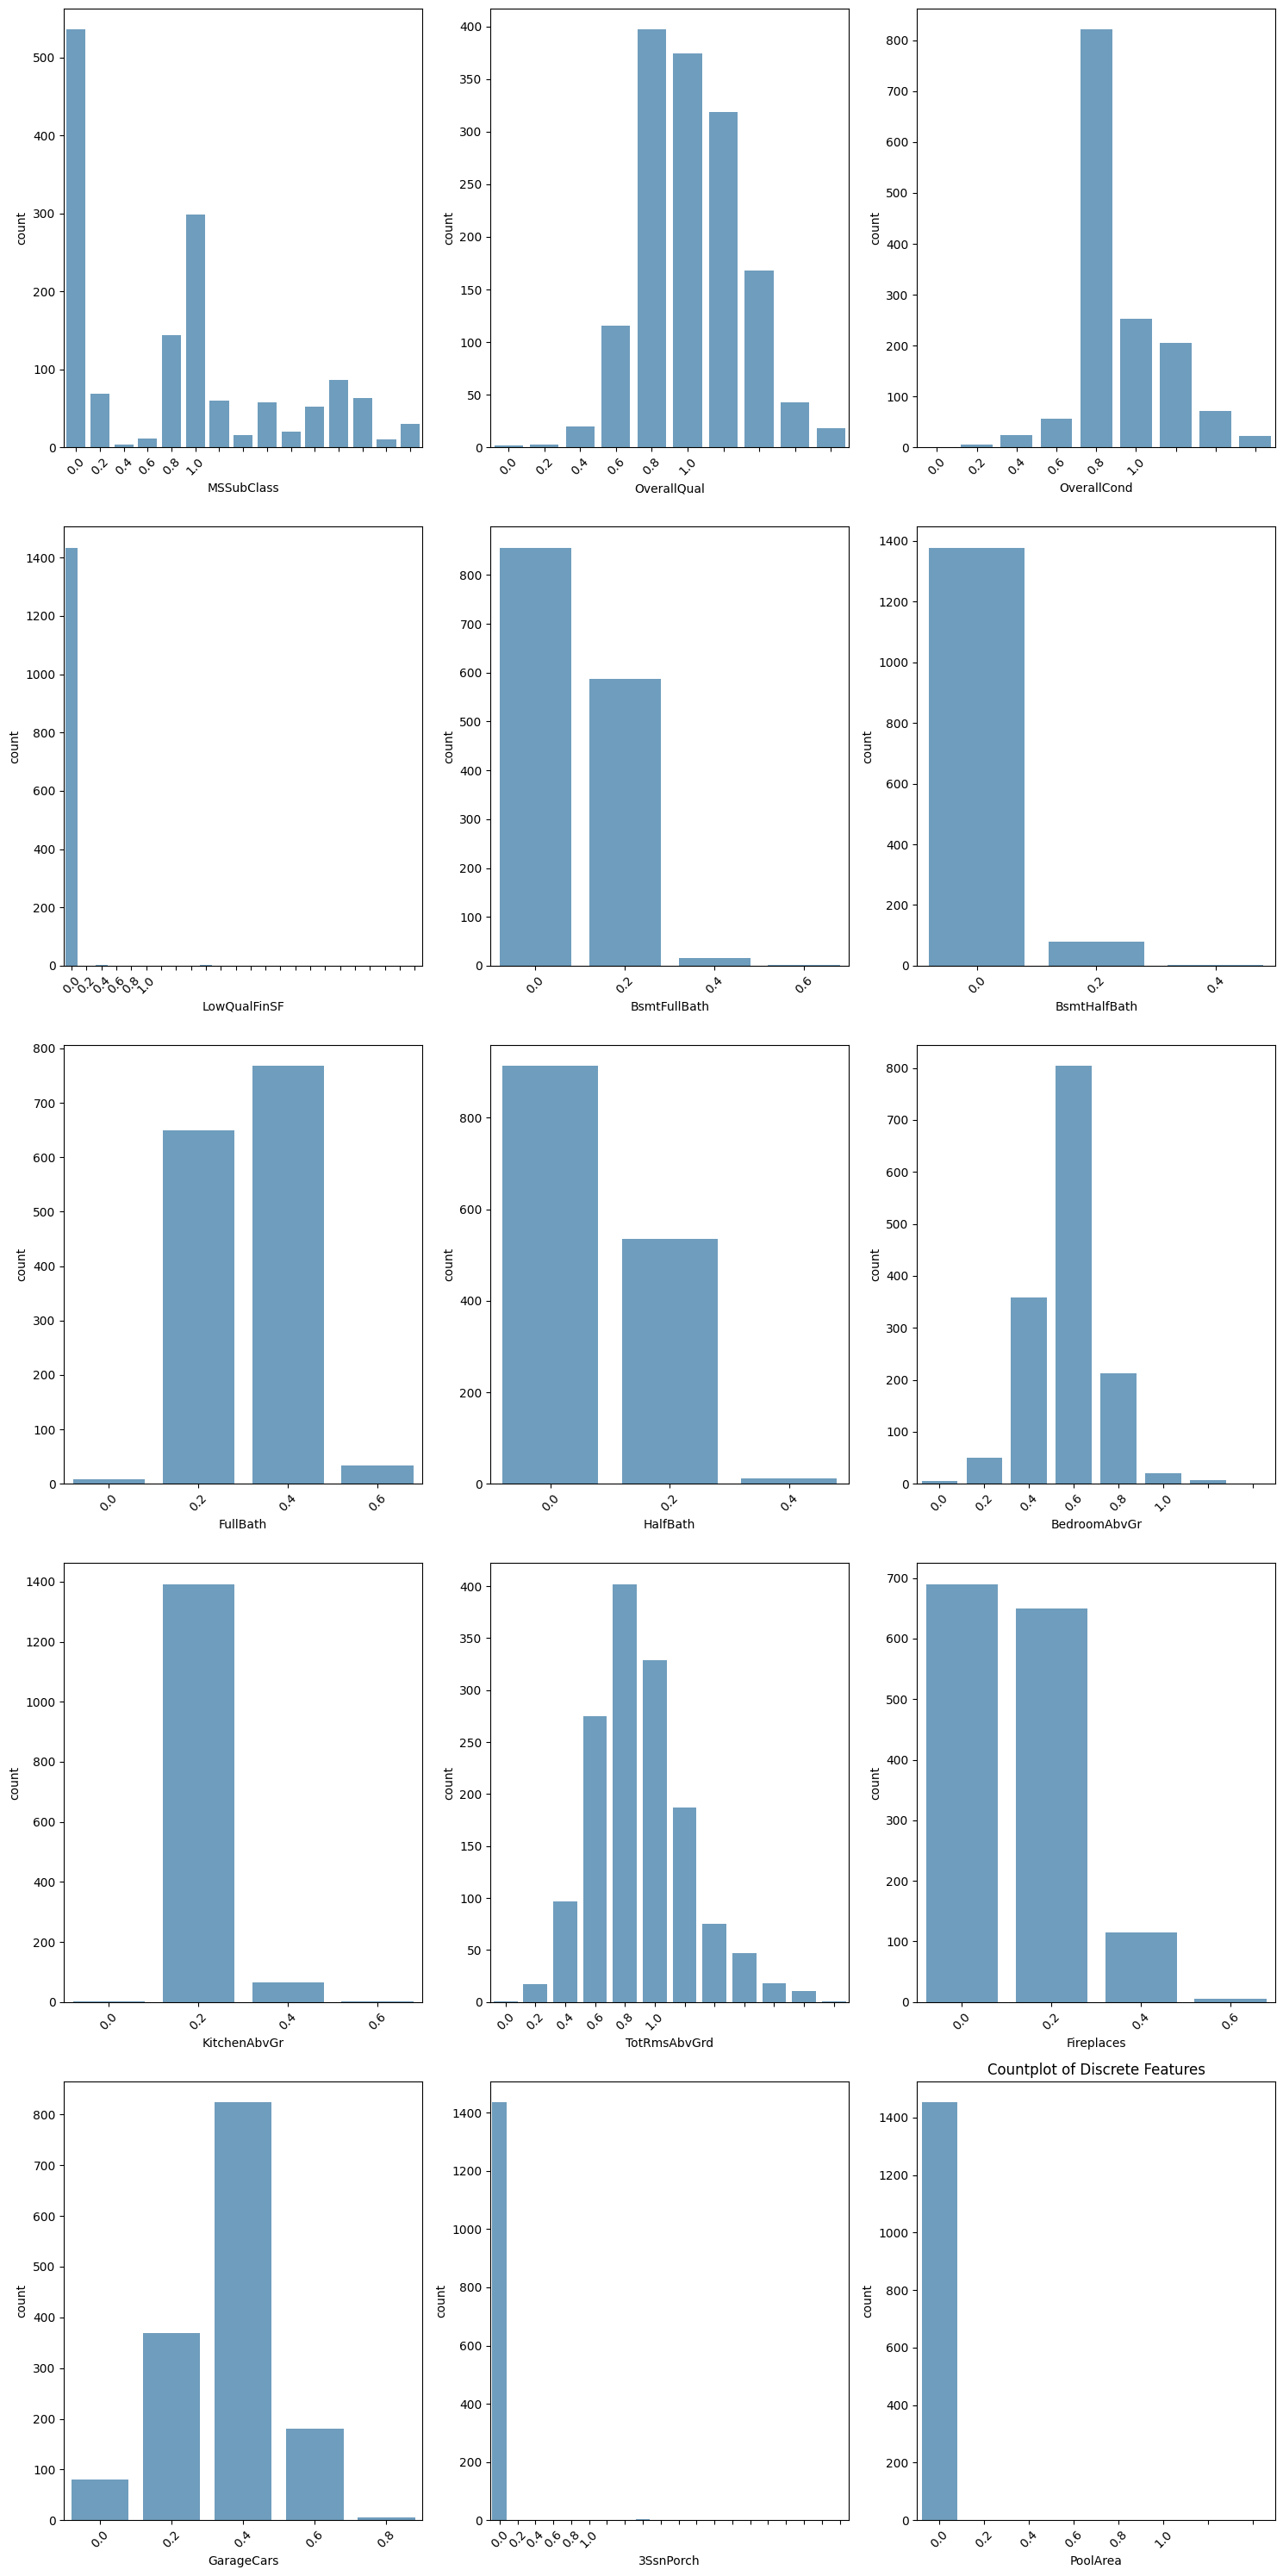

In [27]:
fig, axes = plt.subplots(round(len(df[discrete].columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df[discrete].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df[discrete].columns[i], alpha=0.7, data=df[discrete], ax=ax)
plt.title('Countplot of Discrete Features')
fig.tight_layout()

Text(0.5, 1.0, 'Regression plot of Discrete Features')

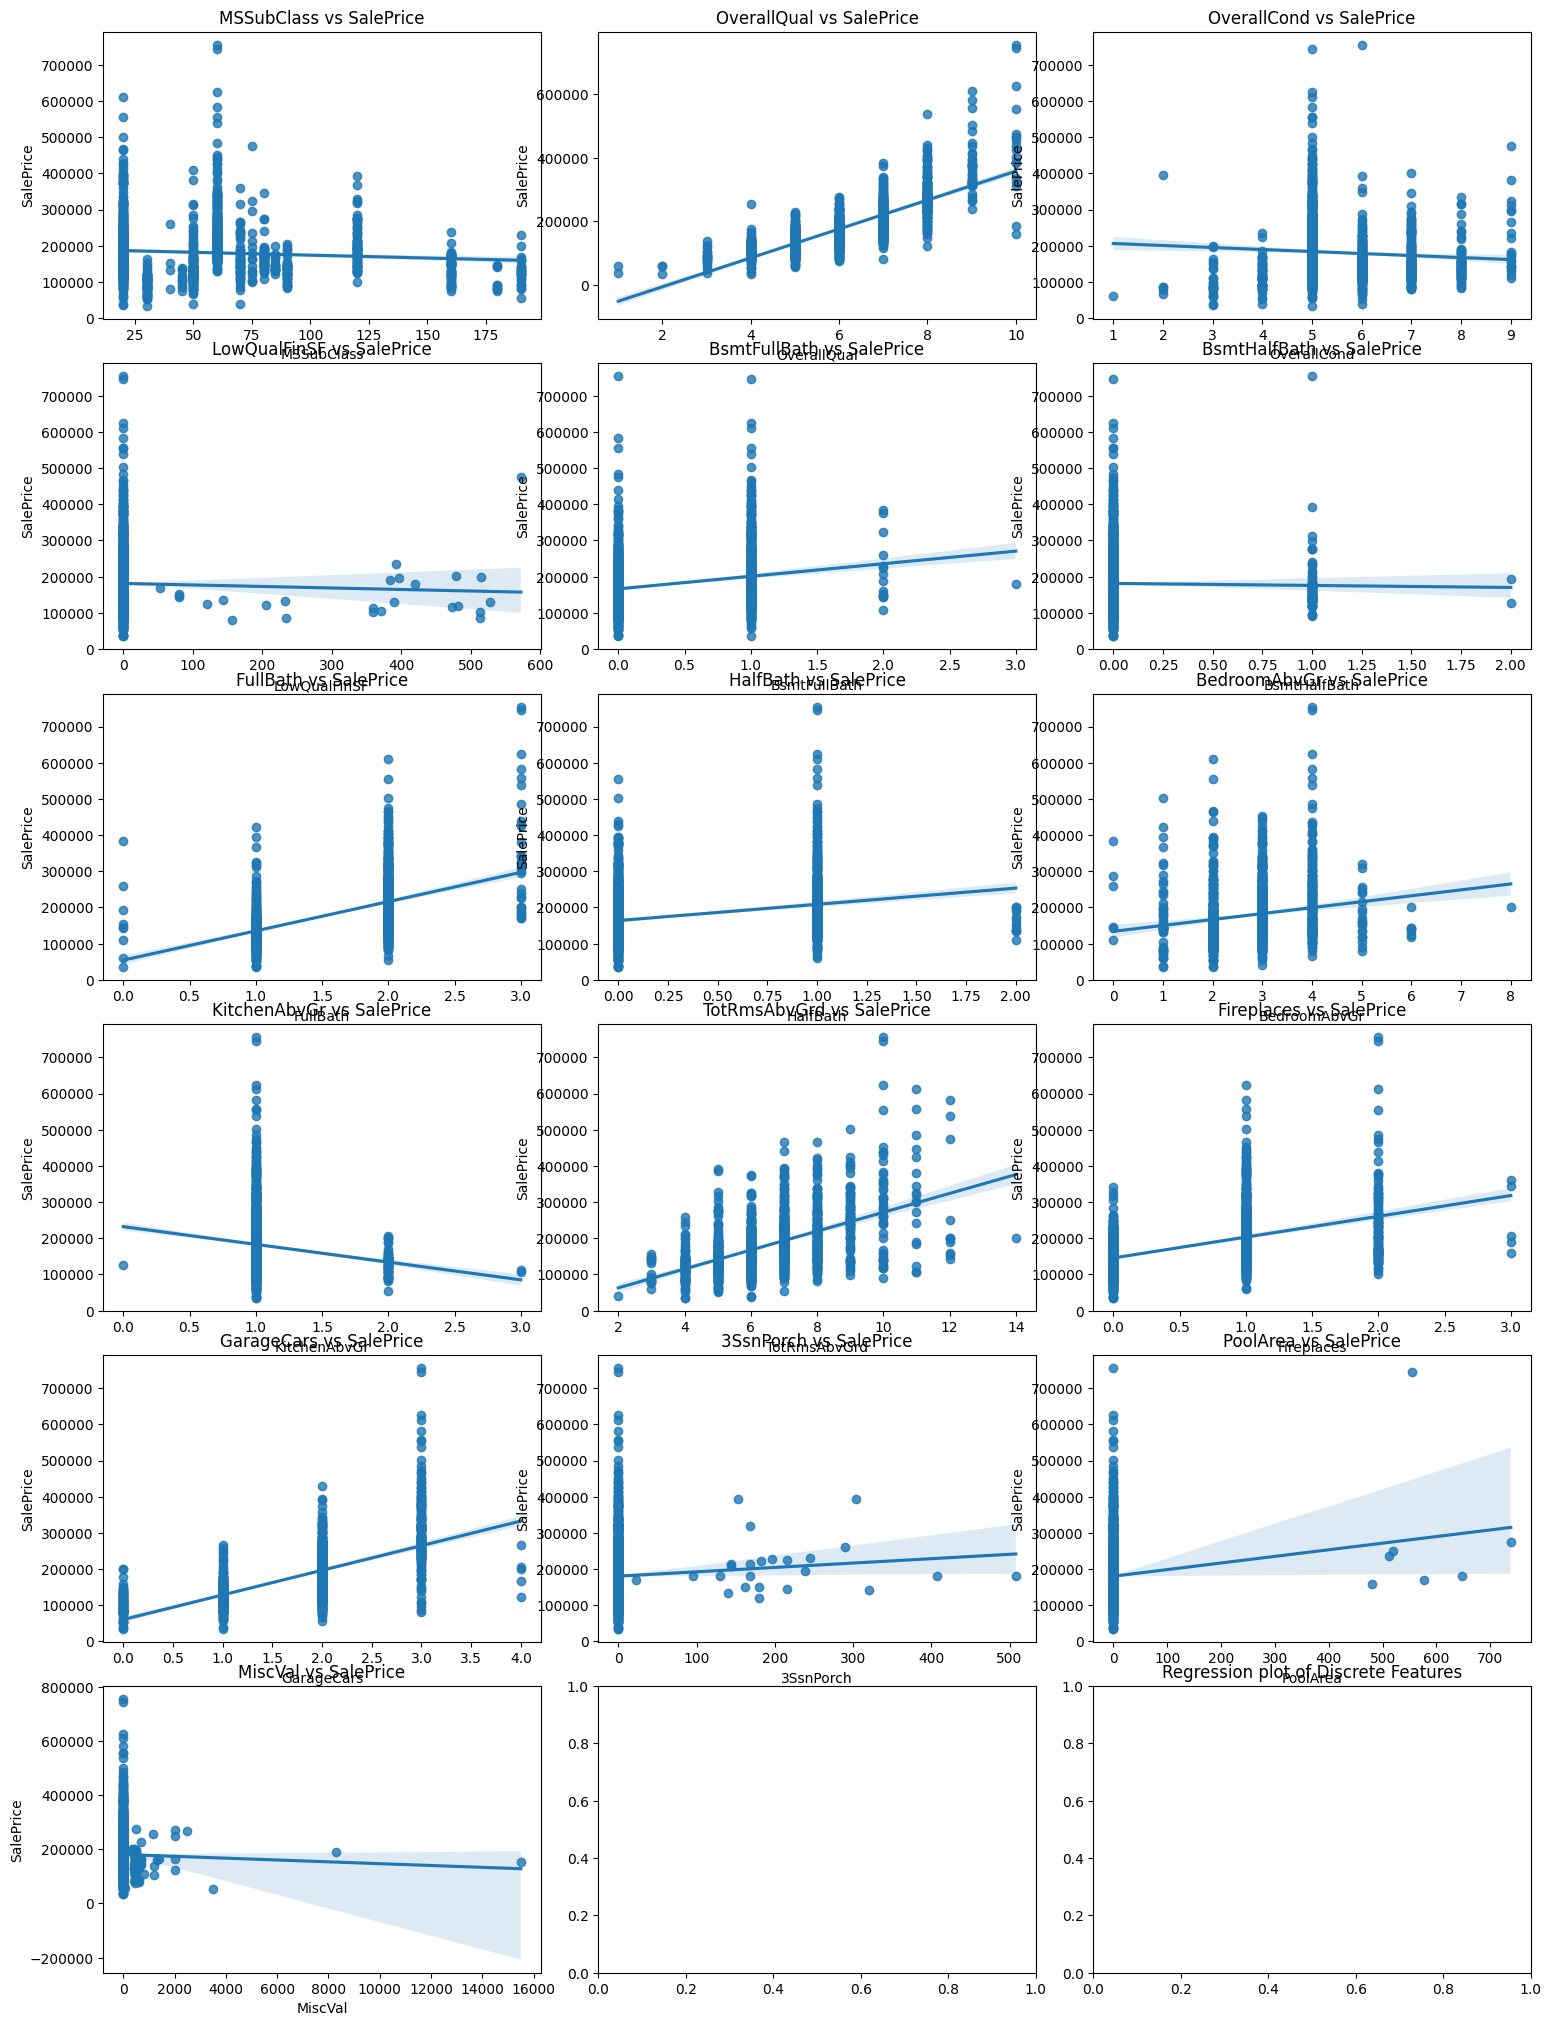

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
fig.tight_layout()

for i, col in enumerate(discrete):
  row, col_idx = divmod(i, 3)
  sns.regplot(x=col, y='SalePrice', data=df, ax=axes[row, col_idx])
  axes[row, col_idx].set_title(f"{col} vs SalePrice")
plt.title('Regression plot of Discrete Features')

Text(0.5, 1.0, 'Median SalePrice by Discrete Features')

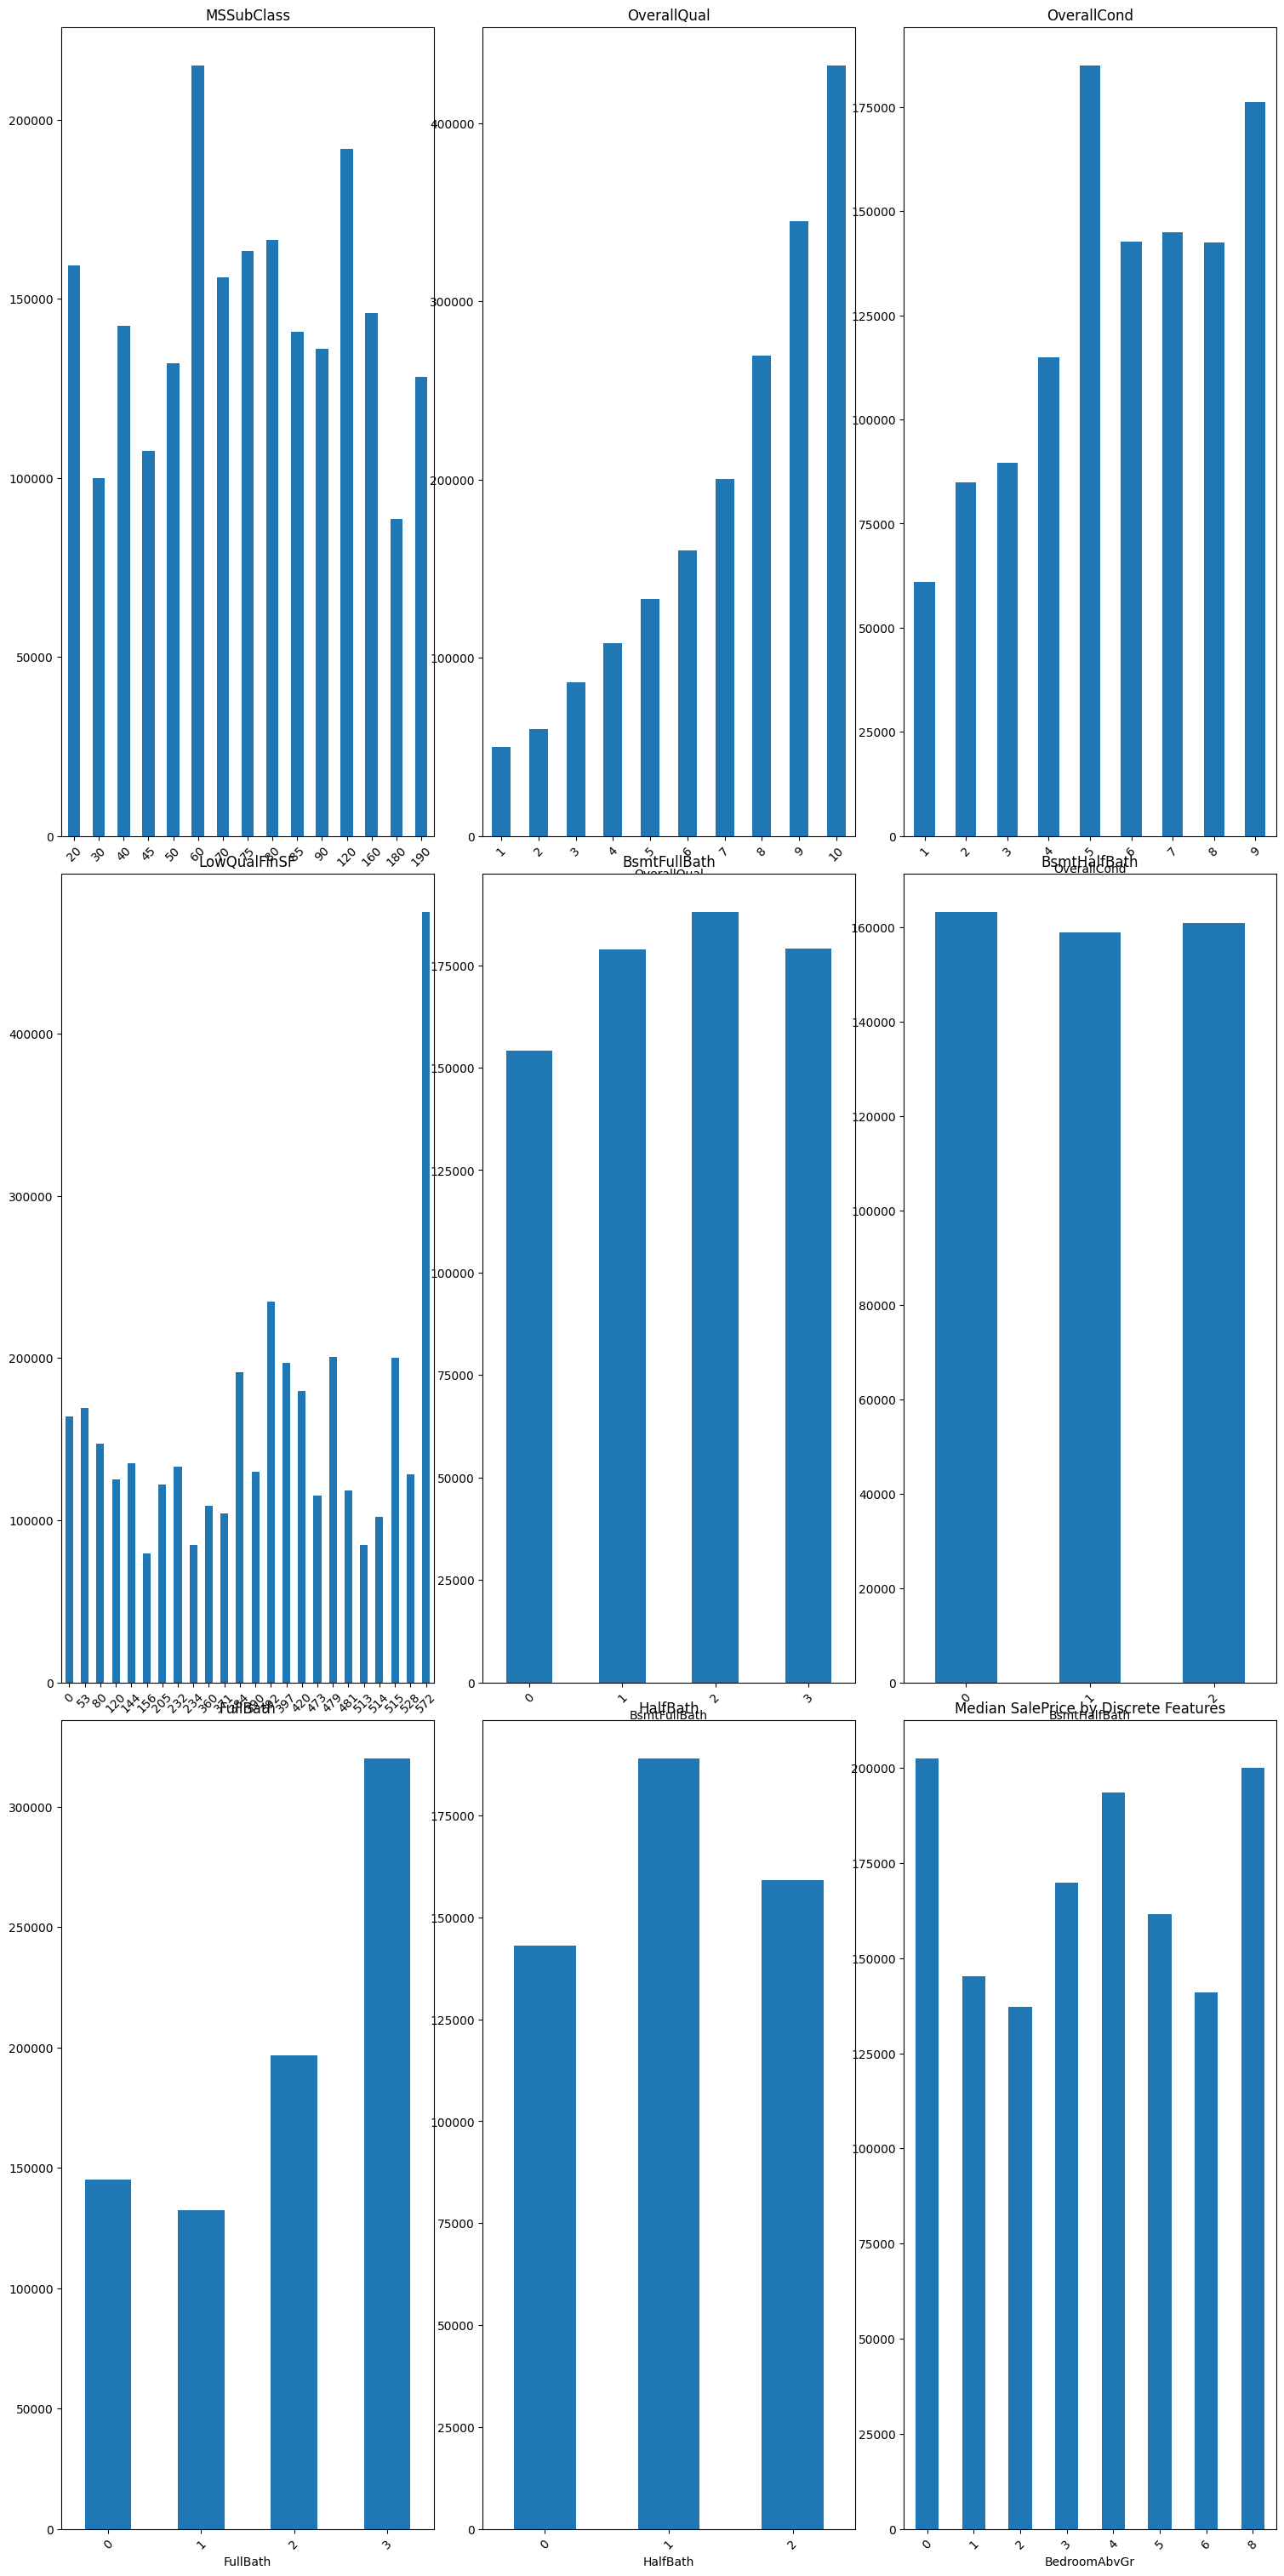

In [29]:
nrows = (len(discrete) - 1) // 4
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 30))
fig.tight_layout()

for i, col in enumerate(discrete):
  if i >= len(axes.flat):  # Check if we've reached the limit of subplots
      break
  n_unique_values = df[col].nunique()
  if n_unique_values > 1:  # Plot only if there are more than 1 unique value
      df.groupby(col)['SalePrice'].median().plot(kind='bar', ax=axes.flat[i])
      axes.flat[i].set_title(col)
      axes.flat[i].set_xticklabels(axes.flat[i].xaxis.get_majorticklabels(), rotation=45)
plt.title('Median SalePrice by Discrete Features')
# Example usage:

Text(0.5, 1.0, 'Barplot of Median SalePrice by Discrete Features')

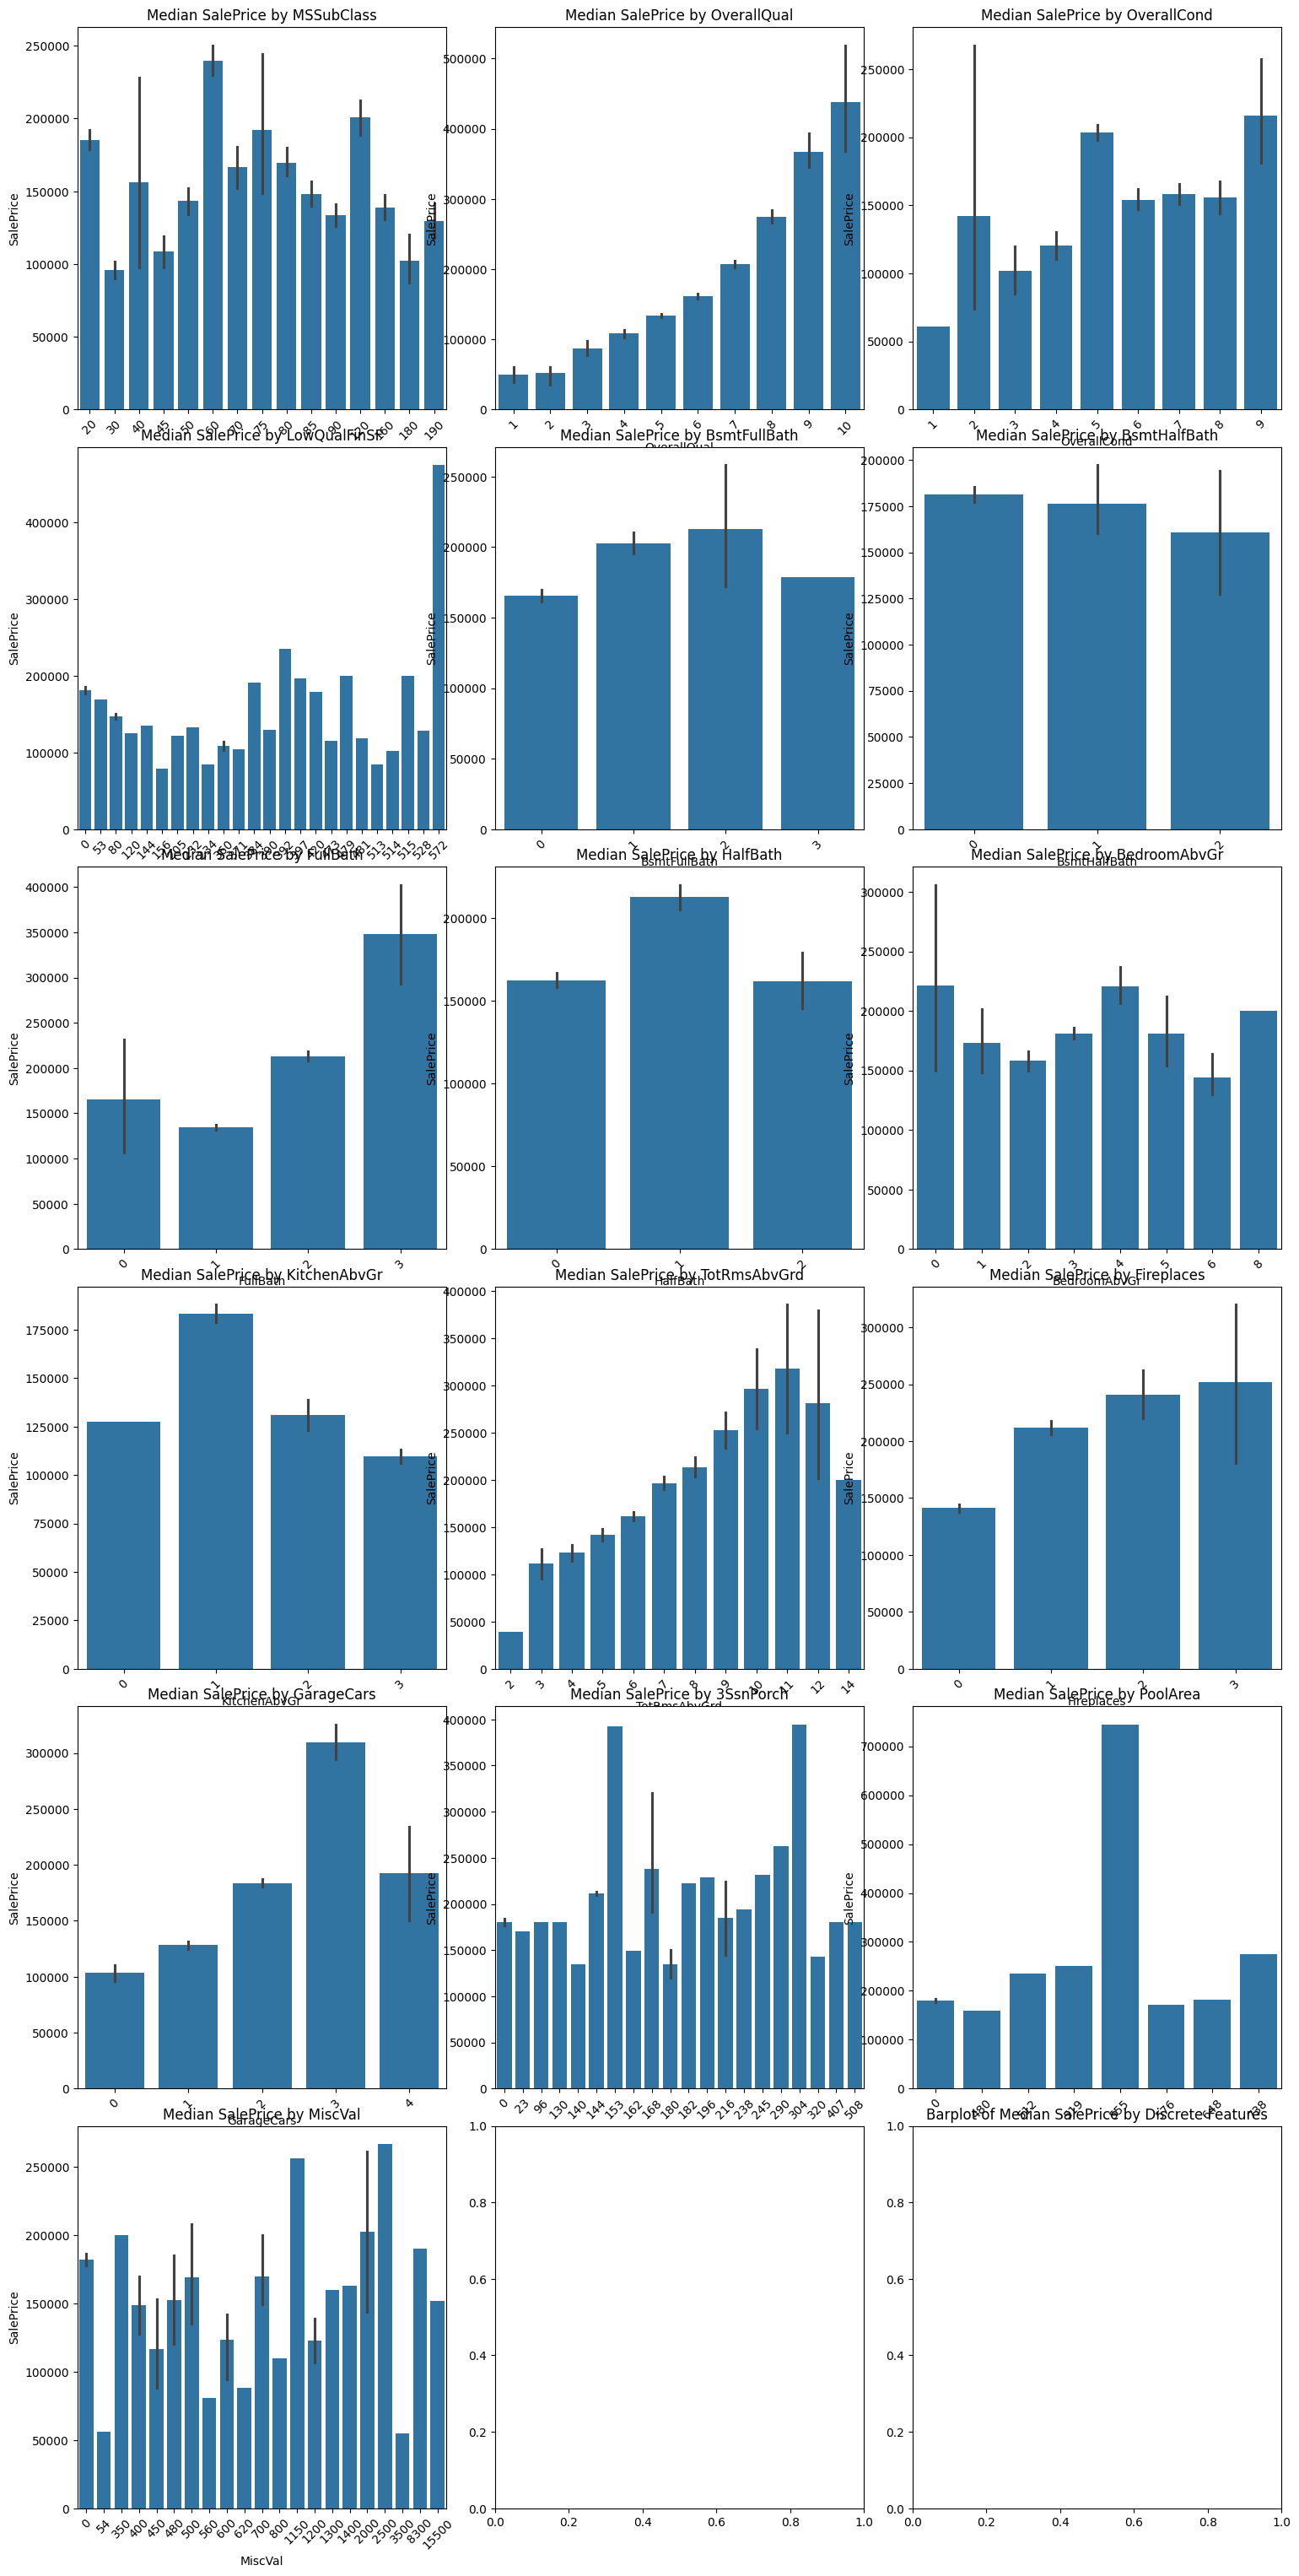

In [30]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))
fig.tight_layout()

for i, col in enumerate(discrete):
  row, col_idx = divmod(i, 3)
  sns.barplot(x=col, y='SalePrice', data=df, ax=axes[row, col_idx])
  axes[row, col_idx].set_title(f'Median SalePrice by {col}')
  axes[row, col_idx].set_xticklabels(axes[row, col_idx].get_xticklabels(), rotation=45)
plt.title('Barplot of Median SalePrice by Discrete Features')

### DATE VARIABLES

Text(0.5, 1.0, 'Histogram Distribution of the Year Features')

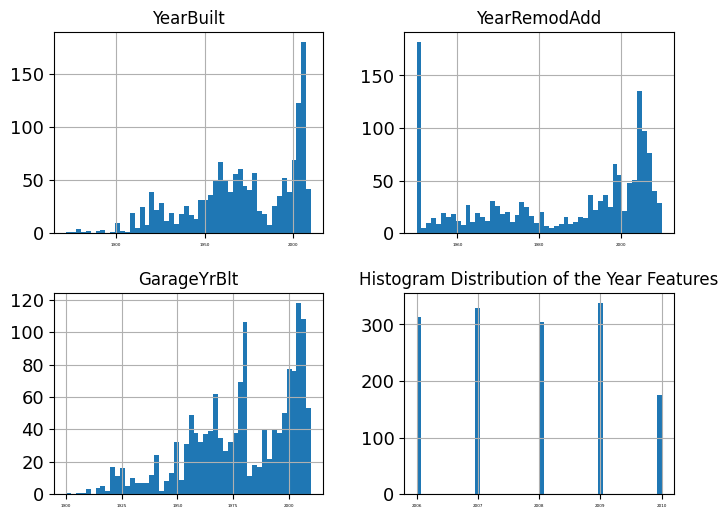

In [31]:
df[year].hist(figsize=(8, 6), bins=50, xlabelsize=3, ylabelsize=13)
plt.title('Histogram Distribution of the Year Features')

- A lot more renovations were made as well as garages and new houses built in the more recent years.

In [32]:
# converting dtypes for date columns:
for col in year:
    df[col] = pd.to_datetime(df[col],format='%Y').dt.year


for col in month:
    df[col] = pd.to_datetime(df[col], format='%m').dt.month

df[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003         2003       2    2008
1       1976          1976         1976       5    2007
2       2001          2002         2001       9    2008
3       1915          1970         1998       2    2006
4       2000          2000         2000      12    2008

In [33]:
dates = ["MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]

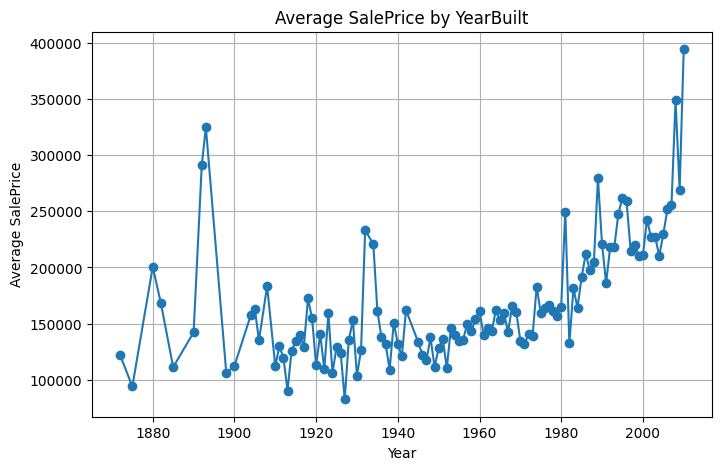

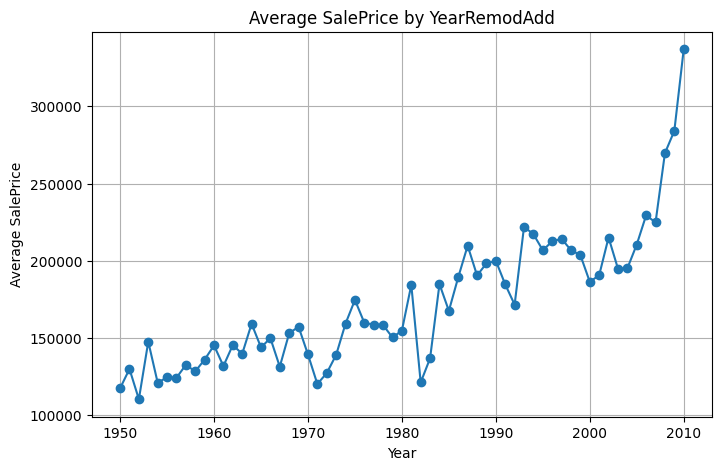

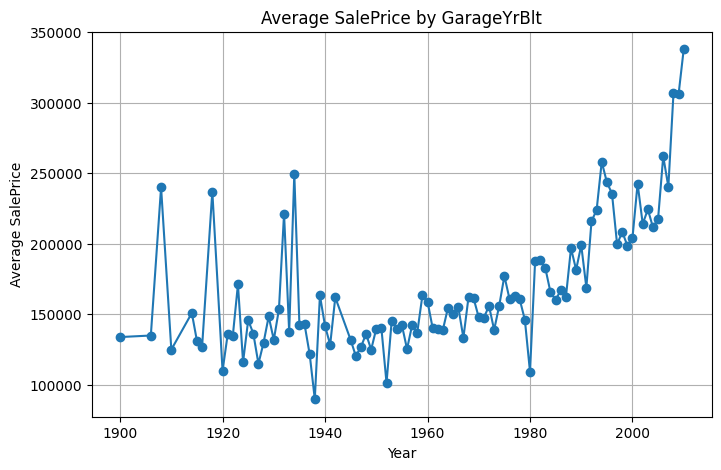

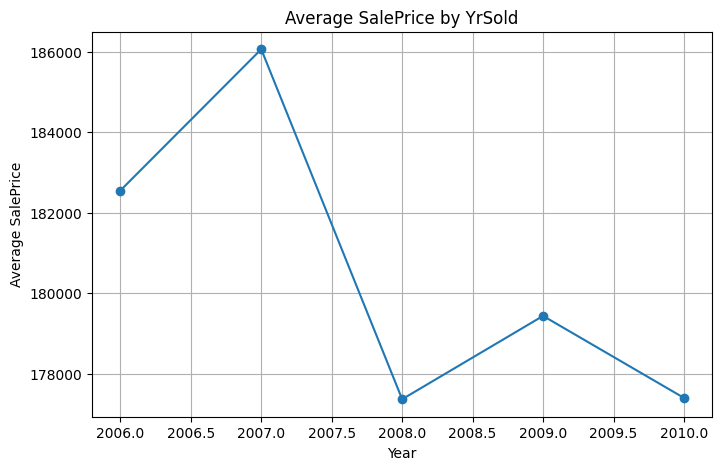

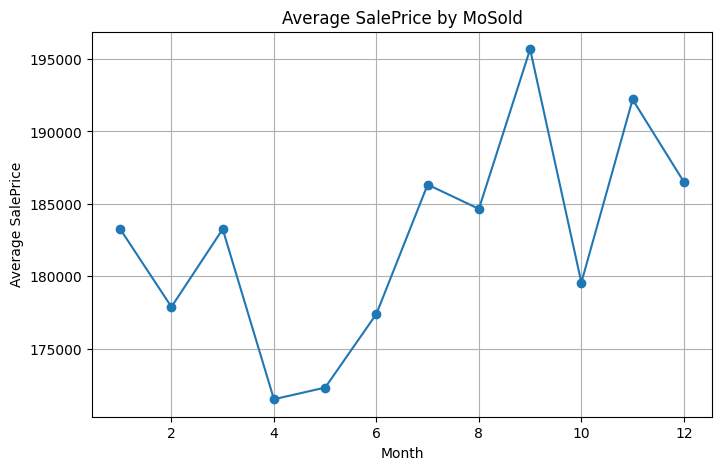

In [34]:
for col in year:
    # Calculating annual average sales prices:
    yearly_avg = df.groupby(col)['SalePrice'].mean().reset_index()
    # Creating the chart:
    plt.figure(figsize=(8, 5))
    plt.plot(yearly_avg[col], yearly_avg['SalePrice'], marker='o', linestyle='-')
    plt.title(f'Average SalePrice by {col}')
    plt.xlabel('Year')
    plt.ylabel('Average SalePrice')
    plt.grid(True)
    plt.show()

for col in month:
    # Calculating monthly average sales prices:
    monthly_avg = df.groupby(col)['SalePrice'].mean().reset_index()
    # Creating the chart:
    plt.figure(figsize=(8, 5))
    plt.plot(monthly_avg[col], monthly_avg['SalePrice'], marker='o', linestyle='-')
    plt.title(f'Average SalePrice by MoSold')
    plt.xlabel('Month')
    plt.ylabel('Average SalePrice')
    plt.grid(True)
    plt.show()

### CATEGORICAL VARIABLES

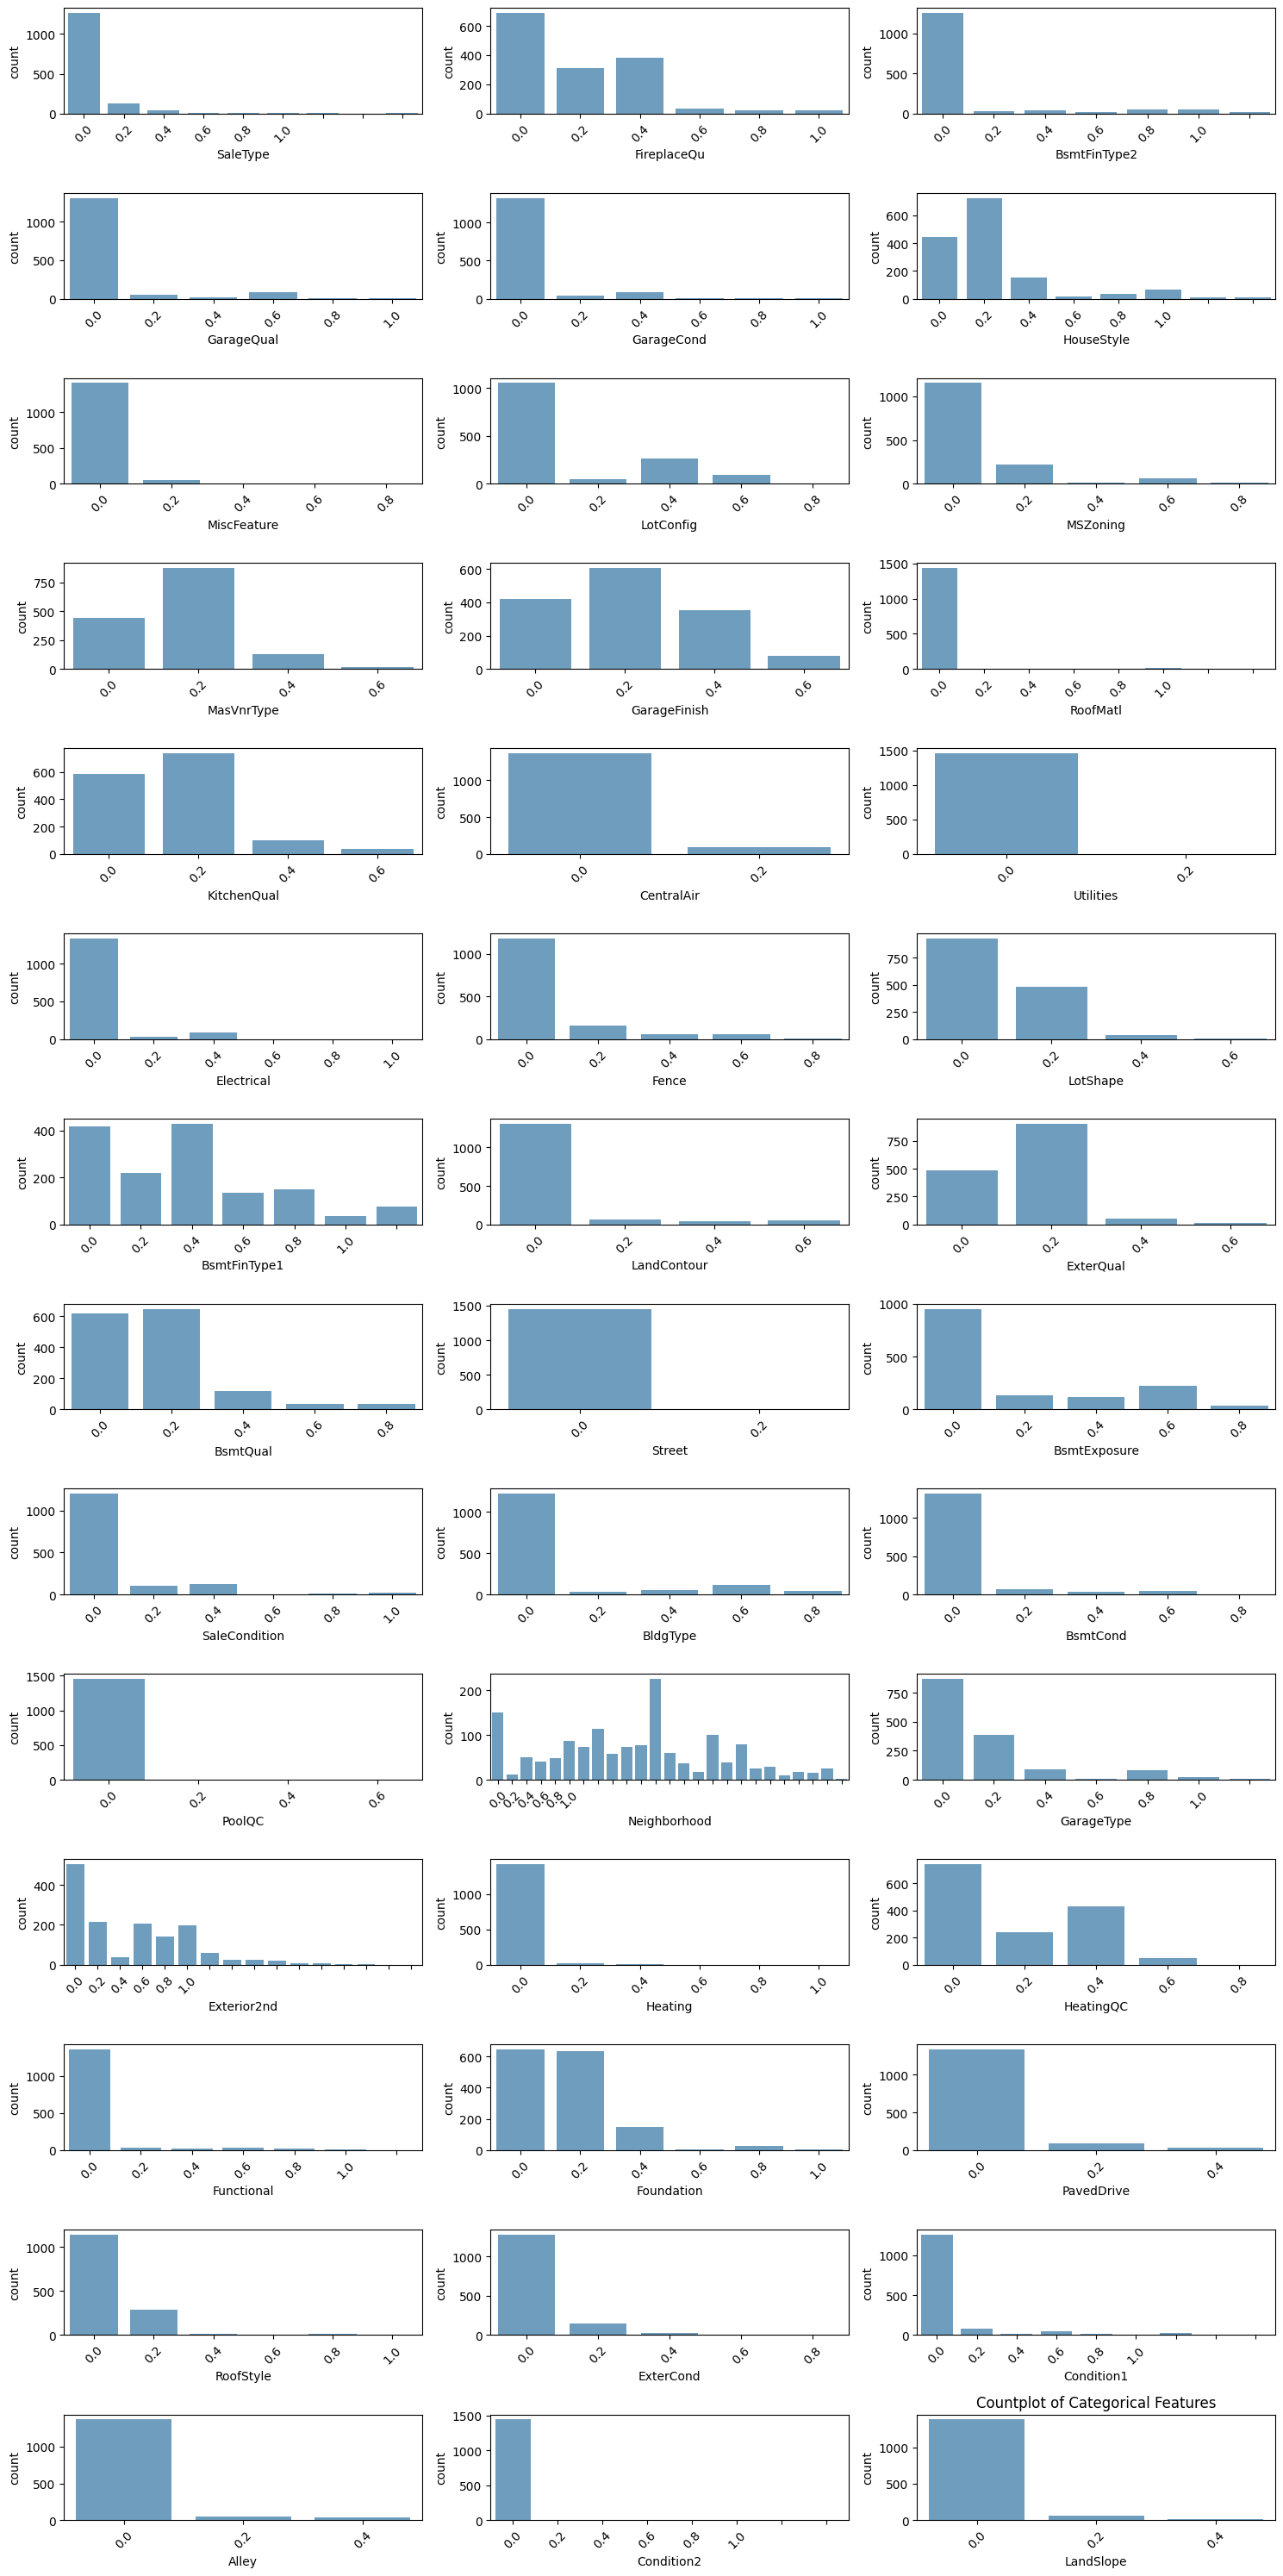

In [35]:
fig, axes = plt.subplots(round(len(df[categorical].columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df[categorical].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df[categorical].columns[i], alpha=0.7, data=df[categorical], ax=ax)
plt.title('Countplot of Categorical Features')
fig.tight_layout()

In [36]:
#fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
#fig.tight_layout()

#for i, col in enumerate(categorical):
#  row, col_idx = divmod(i, ncols)
#   sns.countplot(x=col, y='SalePrice', data=df, ax=axes[row, col_idx])

#  sns.boxplot(x=col, y='SalePrice', data=df, showmeans=True, ax=axes[row, col_idx])
#  axes[row, col_idx].set_title(f"{col} vs SalePrice")

In [37]:
def plot_boxplots(col):
    g = pd.concat([df['SalePrice'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(g, x=col, y='SalePrice')
    fig.axis(ymin=0, ymax=800000)
    plt.title(f'Boxplot of SalePrice by {col}')

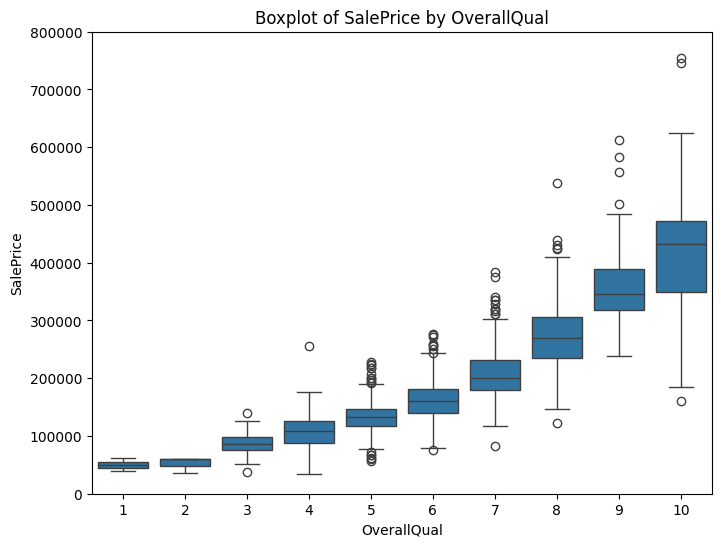

In [38]:
plot_boxplots('OverallQual')

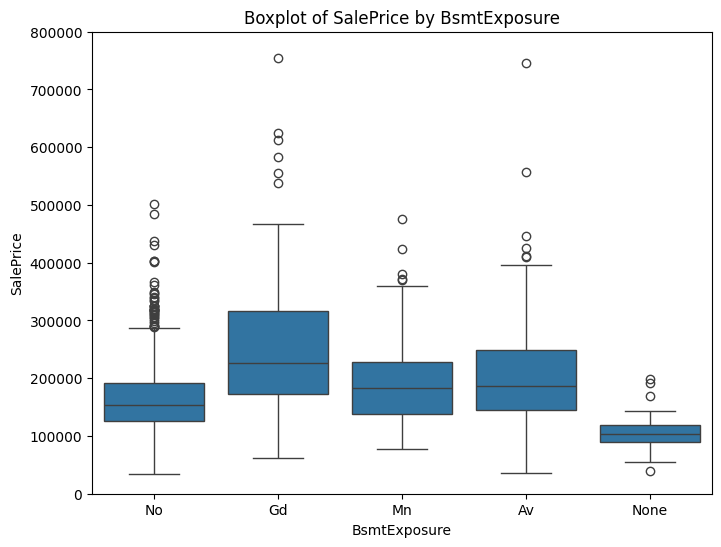

In [39]:
plot_boxplots('BsmtExposure')

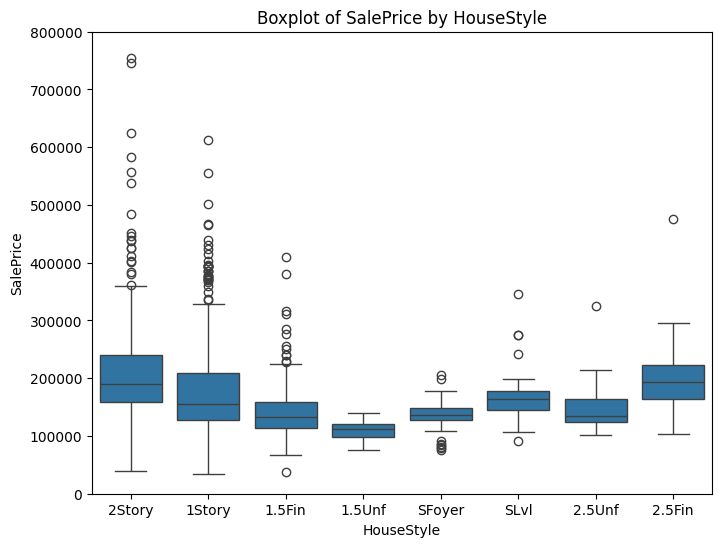

In [40]:
plot_boxplots('HouseStyle')

## 2.3: OUTLIERS

In [41]:
df.shape

(1460, 80)

<Axes: xlabel='OverallQual'>

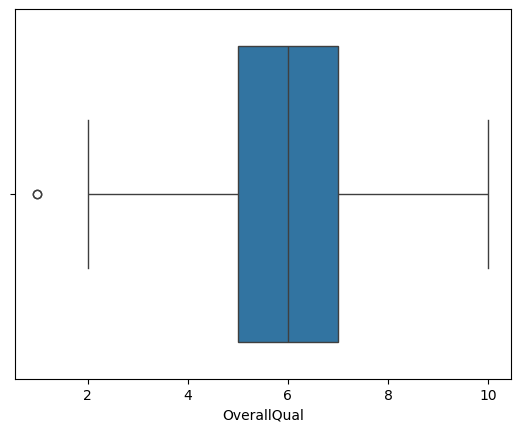

In [42]:
sns.boxplot(df, x='OverallQual')

In [43]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is of object (string) type
        #return df[col]  # Skip if it's a string column

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound, df[col]))

    #return df[col]


<Axes: xlabel='OverallQual'>

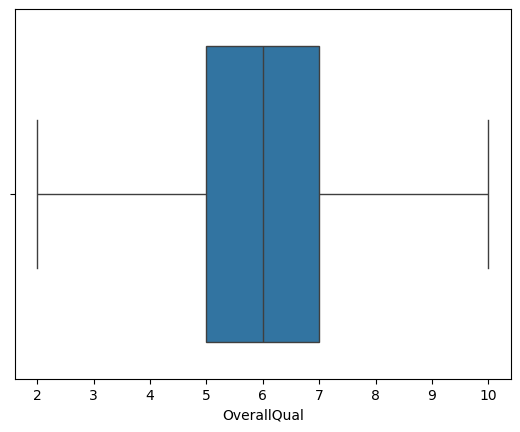

In [44]:
sns.boxplot(df, x='OverallQual')

# PHASE 3

In [45]:
dataframe = df.copy()

In [46]:
print(f'continuous:\n{continuous}\n')
print(f'discrete:\n{discrete}\n')
print(f'year:\n{year}\n')
print(f'categorical:\n{categorical}\n')

continuous:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

discrete:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal']

year:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

categorical:
['SaleType', 'FireplaceQu', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'HouseStyle', 'MiscFeature', 'LotConfig', 'MSZoning', 'MasVnrType', 'GarageFinish', 'RoofMatl', 'KitchenQual', 'CentralAir', 'Utilities', 'Electrical', 'Fence', 'LotShape', 'BsmtFinType1', 'LandContour', 'ExterQual', 'BsmtQual', 'Street', 'BsmtExposure', 'SaleCondition', 'BldgType', 'BsmtCond', 'PoolQC', 'Neighborhood', 'GarageType', 'Exterior2nd', 'Heating', 'HeatingQC', 'Fu

## 3.1: NEW FEATURES

In [47]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['GaragePresent'] = df['GarageType'].apply(lambda x: 1 if x != 'NA' or x != 'None' else 0)

In [48]:
continuous.append('TotalSF')
discrete.append('TotalBath')
year.append('HouseAge')
dates.append('HouseAge')
numeric.extend(['TotalSF', 'TotalBath', 'HouseAge'])
categorical.append('GaragePresent')

## 3.2: CATEGORICAL ENCODING

In [49]:
ordinal = ['KitchenQual', 'OverallQual']
high_cardinality_threshold = 50

for col in categorical:
  if col in ordinal:
    # Label encode ordinal columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  elif df[col].nunique() > high_cardinality_threshold:
    # Handle high cardinality columns (e.g., using frequency encoding)
    df[col + '_freq'] = df[col].map(df[col].value_counts(normalize=True))
  else:
    # One-hot encode nominal columns
    df = pd.get_dummies(df, columns=[col], prefix=col)

## 3.3: NUMERIC ENCODING

In [50]:
print(f'continuous:\n{continuous}\n')
print(f'discrete:\n{discrete}\n')
print(f'year:\n{year}\n')

continuous:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF']

discrete:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'TotalBath']

year:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'HouseAge']



In [51]:
for col in discrete:
  print(f'{col}\n{df[col].unique()}\n')

MSSubClass
[ 60.  20.  70.  50. 145.  45.  90. 120.  30.  85.  80.  75.  40.]

OverallQual
[ 7.  6.  8.  5.  9.  4. 10.  3.  2.]

OverallCond
[5.  7.5 6.  7.  4.  3.5]

LowQualFinSF
[0.]

BsmtFullBath
[1.  0.  2.  2.5]

BsmtHalfBath
[0.]

FullBath
[2. 1. 3. 0.]

HalfBath
[1. 0. 2.]

BedroomAbvGr
[3.  4.  1.  2.  0.5 4.5]

KitchenAbvGr
[1.]

TotRmsAbvGrd
[ 8.  6.  7.  9.  5. 10.  4.  3.  2.]

Fireplaces
[0.  1.  2.  2.5]

GarageCars
[2.  3.  1.  0.  3.5]

3SsnPorch
[0.]

PoolArea
[0.]

MiscVal
[0.]

TotalBath
[2.5 2.  1.  1.5 3.  3.5 0.5 0. ]



In [52]:
scaler = StandardScaler()
df[continuous] = scaler.fit_transform(df[continuous])

In [53]:
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0    -0.237456 -0.333244          7.0          5.0     2003.0   
1        20.0     0.633321 -0.013189          6.0          7.5     1976.0   
2        60.0    -0.063300  0.446022          7.0          5.0     2001.0   
3        70.0    -0.527714 -0.027104          7.0          5.0     1915.0   
4        60.0     0.865528  1.283733          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        2003.0    0.795643    0.614224         0.0  -0.958790    -0.488321   
1        1976.0   -0.667353    1.242296         0.0  -0.648290     0.532289   
2        2002.0    0.541858    0.106224         0.0  -0.300716    -0.327437   
3        1970.0   -0.667353   -0.517230         0.0  -0.055097    -0.739702   
4        2000.0    1.945140    0.496460         0.0  -0.170955     0.238172   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.830489  1.164283           0.0   0.428636           1.0           0.0   
1  0.289638 -0.796041           0.0  -0.502349           0.0           0.0   
2 -0.653917  1.191828           0.0   0.586571           1.0           0.0   
3 -0.540801  0.939328           0.0   0.443182           1.0           0.0   
4 -0.033157  1.621080           0.0   1.442744           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0           1.0            2           8.0   
1       2.0       0.0           3.0           1.0            3           6.0   
2       2.0       1.0           3.0           1.0            2           6.0   
3       1.0       0.0           3.0           1.0            2           7.0   
4       2.0       1.0           4.0           1.0            2           9.0   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         0.0       2003.0         2.0    0.373509   -0.787243     0.350520   
1         1.0       1976.0         2.0   -0.051541    1.768105    -0.811747   
2         1.0       2001.0         2.0    0.663315   -0.787243    -0.011497   
3         1.0       1998.0         3.0    0.827539   -0.787243    -0.144872   
4         1.0       2000.0         3.0    1.764579    0.859156     0.788753   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3            0.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice   TotalSF  TotalBath  HouseAge  SaleType_COD  SaleType_CWD  \
0   0.463935  0.412831        2.5       5.0         False         False   
1   0.062047 -0.484136        2.0      31.0         False         False   
2   0.687207  0.564995        2.5       7.0         False         False   
3  -0.555671  0.426846        1.0      91.0         False         False   
4   1.081653  1.389884        2.5       8.0         False         False   

   SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0         False           False           False           False         False   
1         False           False           False           False         False   
2         False           False           False           False         False   
3         False           False           False           False         False   
4         False           False           False           False         False   

   SaleType_Oth  SaleType_WD  FireplaceQu_Ex  FireplaceQu_Fa  FireplaceQu_Gd  \
0         False         True           False           False           False   
1         False         True           False           False       

In [54]:
df.shape

(1460, 305)

# PHASE 4

## 4.1: SPLITTING DATA

In [55]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2: CHOOSING MACHINE LEARNING ALGORITHMS

Based on the problem type , dataset characteristics , and desired performance metrics.

- Problem type: Regression for predicting a continuous value ie Sale Price.
- Dataset size: Large
- Feature complexity: Linear models might be suitable for simple relationships, while tree-based models can handle complex interactions.
- Regression: Linear Regression, Decision Trees, Random Forest, Gradient Boosting, Support Vector Regression.

## 4.3: MODEL TRAINING

In [56]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

Linear Regression: RMSE=149181.13, MAE=12508.42, R2=-20544800740.69
Decision Tree: RMSE=0.45, MAE=0.32, R2=0.81
Random Forest: RMSE=0.30, MAE=0.22, R2=0.92


- Linear Regression: The model performs extremely poorly, as indicated by the high RMSE and MAE values, and a negative R² value.
- Decision Tree: Shows a significant improvement over Linear Regression, with a reasonable R² value.
- Random Forest: Outperforms both models, demonstrating the highest R² value and lowest error metrics (RMSE and MAE).

## 4.4: HYPERPARAMETER TUNING

In [57]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

## 4.5: BEST PERFORMING MODEL

In [58]:
y_pred = best_model.predict(X_test)

# PHASE 5

## 5.1: INTERPRETING RESULTS

In [59]:
print(f"best mean cross-validation score: {grid_search.best_score_}")
print(f"best parameters: {grid_search.best_params_}")
print(f"best model: {grid_search.best_estimator_}")

print(f"test-set score: {grid_search.score(X_test, y_test):.3f}")

best mean cross-validation score: 0.881410121370519
best parameters: {'max_depth': 15, 'n_estimators': 300}
best model: RandomForestRegressor(max_depth=15, n_estimators=300)
test-set score: 0.915


In [60]:
results = pd.DataFrame(grid_search.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [61]:
results.params

0     {'max_depth': 5, 'n_estimators': 100}
1     {'max_depth': 5, 'n_estimators': 200}
2     {'max_depth': 5, 'n_estimators': 300}
3    {'max_depth': 10, 'n_estimators': 100}
4    {'max_depth': 10, 'n_estimators': 200}
5    {'max_depth': 10, 'n_estimators': 300}
6    {'max_depth': 15, 'n_estimators': 100}
7    {'max_depth': 15, 'n_estimators': 200}
8    {'max_depth': 15, 'n_estimators': 300}
Name: params, dtype: object

Key Outputs:

- Best parameters: The combination of hyperparameters that yielded the best performance.
- Best score: The corresponding performance metric (e.g., R-squared, RMSE) for the best model.
- Grid scores: Performance metrics for all evaluated hyperparameter combinations.
- Best estimator: The trained model with the optimal hyperparameters.

## 5.2: VISUALIZATIONS

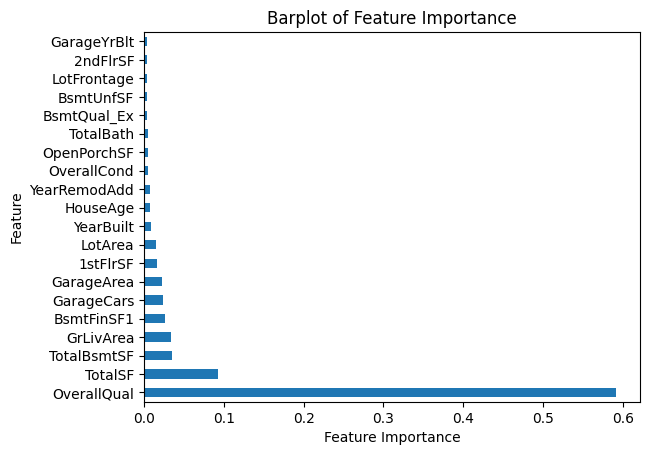

In [62]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns).nlargest(20)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importances
feature_importances.plot(kind='barh')
plt.title('Barplot of Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

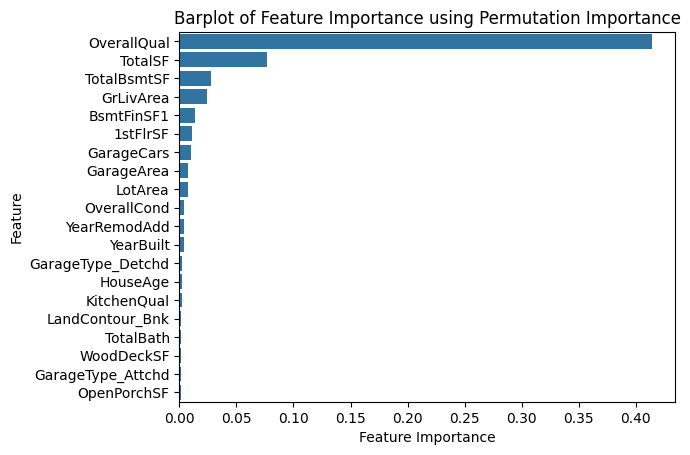

In [63]:
# Feature importance using permutation importance
importances = permutation_importance(best_model, X_test, y_test, n_repeats = 10, random_state = 42)
feature_importances = pd.Series(importances.importances_mean, index = X_test.columns).nlargest(20)

sns.barplot(x = feature_importances, y = feature_importances.index)
plt.title('Barplot of Feature Importance using Permutation Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [64]:
top_feature = feature_importances.index[0]
importance_score = feature_importances.iloc[0]

print(f"{top_feature} is the most important predictor, contributing to \
{importance_score:.2f}% of the model's predictive power. A higher value of \
{top_feature} is associated with an increase in the target \
variable. This aligns with our domain knowledge that {top_feature} is a key \
driver of house price.")

OverallQual is the most important predictor, contributing to 0.41% of the model's predictive power. A higher value of OverallQual is associated with an increase in the target variable. This aligns with our domain knowledge that OverallQual is a key driver of house price.


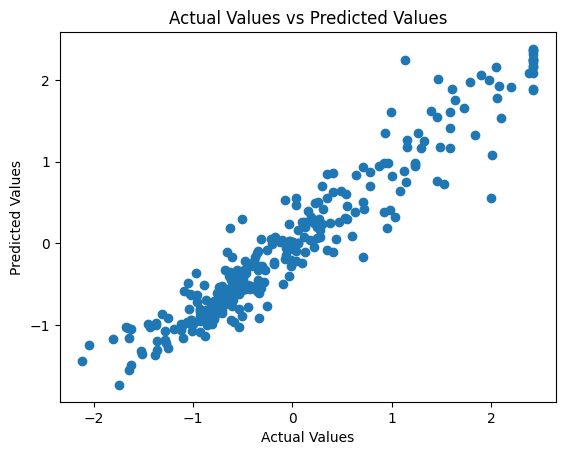

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

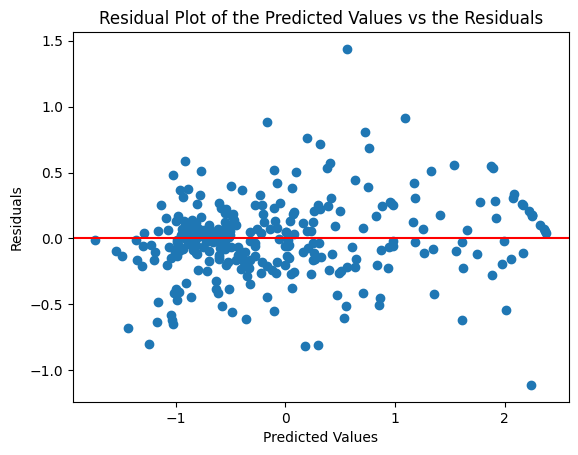

In [66]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot of the Predicted Values vs the Residuals')
plt.show()

# Data Description

In [67]:
file_path = "data_description.txt"
with open(file_path, 'r') as f:
    lines = f.readlines()

descr_data = []
index = 1
for line in lines:
  if ':' in line:  # Check if line contains a column name
    feature, description = line.split(':', 1)
    feature = feature.strip()
    description = description.strip()
    # Assuming data type can be inferred from description (replace with logic if needed)
    descr_data.append([index, feature, description])
    index += 1

descr = pd.DataFrame(descr_data, columns=["Index", "Feature", "Description"])

descr.set_index('Index', inplace=True)
descr.index.name = None

new_features = {
    84: ['TotalSF', 'Total square feet'],
    85: ['TotalBath', 'Total number of baths'],
    86: ['HouseAge', 'Age of the house'],
    87: ['GaragePresent', 'Presence of a garage'],
    88: ['SalePrice', 'Target Variable']
}

for index, new_feature in new_features.items():
    descr.loc[index, 'Feature'] = new_feature[0]
    descr.loc[index, 'Description'] = new_feature[1]
print(descr)

          Feature                                        Description
1      MSSubClass  Identifies the type of dwelling involved in th...
2        MSZoning  Identifies the general zoning classification o...
3     LotFrontage        Linear feet of street connected to property
4         LotArea                            Lot size in square feet
5          Street                    Type of road access to property
..            ...                                                ...
84        TotalSF                                  Total square feet
85      TotalBath                              Total number of baths
86       HouseAge                                   Age of the house
87  GaragePresent                               Presence of a garage
88      SalePrice                                    Target Variable

[88 rows x 2 columns]


In [68]:
print(f'continuous:\n{continuous}\n')
print(f'discrete:\n{discrete}\n')
print(f'year:\n{year}\n')
print(f'dates:\n{dates}\n')
print(f'numeric:\n{numeric}\n')
print(f'categorical:\n{categorical}\n')

continuous:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF']

discrete:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'TotalBath']

year:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'HouseAge']

dates:
['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'HouseAge']

numeric:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firep

In [69]:
for feature in descr['Feature']:
  d_t = []  # Use a list to store multiple types
  if feature in continuous:
      d_t.append('continuous')
  if feature in discrete:
      d_t.append('discrete')
  if feature in year:
      d_t.append('year')
  if feature in dates:
      d_t.append('date')
  if feature in numeric:
      d_t.append('numeric')
  if feature in categorical:
      d_t.append('categorical')
  if not d_t:
      d_t.append('unknown')
  descr.loc[descr['Feature'] == feature, 'Data Type'] = ', '.join(d_t)
descr.head()

Feature                                        Description  \
1   MSSubClass  Identifies the type of dwelling involved in th...   
2     MSZoning  Identifies the general zoning classification o...   
3  LotFrontage        Linear feet of street connected to property   
4      LotArea                            Lot size in square feet   
5       Street                    Type of road access to property   

             Data Type  
1    discrete, numeric  
2          categorical  
3  continuous, numeric  
4  continuous, numeric  
5          categorical

In [70]:
descr.to_csv('data_description.csv', index=False)